In [1]:
import xarray as xr
import numpy as np
import scipy
import matplotlib.pyplot as plt
from rotary_analysis import * # custom library 

plt.rcParams['text.usetex'] = True

In [2]:
data_dir = '~/Desktop/thesis/experimental_data/'

In [3]:
# load data

r09_standard_avg_coeff   = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_coeff/R09_w320_c60_180_avg_coeff.nc')
r09_standard_avg_spectra = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_spectra/R09_w320_c60_180_avg_spectra.nc')

r08_standard_avg_coeff   = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_coeff/R08_w320_c60_180_avg_coeff.nc')
r08_standard_avg_spectra = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_spectra/R08_w320_c60_180_avg_spectra.nc')

r10_standard_avg_coeff   = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_coeff/R10_w320_c60_180_avg_coeff.nc')
r10_standard_avg_spectra = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_spectra/R10_w320_c60_180_avg_spectra.nc')

r15_standard_avg_coeff   = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_coeff/R15_w320_c60_180_avg_coeff.nc')
r15_standard_avg_spectra = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_spectra/R15_w320_c60_180_avg_spectra.nc')

r16_standard_avg_coeff   = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_coeff/R16_w320_c60_180_avg_coeff.nc')
r16_standard_avg_spectra = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_spectra/R16_w320_c60_180_avg_spectra.nc')

r17_standard_avg_coeff   = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_coeff/R17_w320_c60_180_avg_coeff.nc')
r17_standard_avg_spectra = xr.open_dataset(data_dir+'window_320m_cutoff_60_180_avg_spectra/R17_w320_c60_180_avg_spectra.nc')

In [4]:
# time average the coefficients 

r08_standard_avg_coeff = r08_standard_avg_coeff.rotary_coeff.mean(dim='profile_number')
r09_standard_avg_coeff = r09_standard_avg_coeff.rotary_coeff.mean(dim='profile_number')
r10_standard_avg_coeff = r10_standard_avg_coeff.rotary_coeff.mean(dim='profile_number')

r15_standard_avg_coeff = r15_standard_avg_coeff.rotary_coeff.mean(dim='profile_number')
r16_standard_avg_coeff = r16_standard_avg_coeff.rotary_coeff.mean(dim='profile_number')
r17_standard_avg_coeff = r17_standard_avg_coeff.rotary_coeff.mean(dim='profile_number')

In [5]:
# get last velocity depth at each station for plotting

r09_raw_data = process_data(9, 0, '/Users/connordiaz/Desktop/thesis/original_data/FSDB_SR1b_V0.1_20221013/')
r09_vel_depth = r09_raw_data[3]
deepest_r09 = float(r09_vel_depth[-1])

r16_raw_data = process_data(16, 0, '/Users/connordiaz/Desktop/thesis/original_data/FSDB_SR1b_V0.1_20221013/')
r16_vel_depth = r16_raw_data[3]
deepest_r16 = float(r16_vel_depth[-1])

### Some Plotting Functions

In [6]:
# mean bootstrapping function for C_m data from 4 different methods 

def mean_bootstrap(m1,m2,m3,m4):
    size = m1.shape[0]
    arr = np.empty((size, 4))
    arr[:,0] = m1
    arr[:,1] = m2
    arr[:,2] = m3
    arr[:,3] = m4
    
    mean = arr.mean(axis=1)
    errb = np.empty((2, size))
    stderr = np.empty((size))
    
    for d in range(size):
        boot = scipy.stats.bootstrap((arr[d,:],),np.mean)
        interval = boot.confidence_interval
        stderr1 = boot.standard_error
        lower = interval[0]
        upper = interval[1]
        
        errb[0,d] = np.abs(mean[d] - lower)
        errb[1,d] = np.abs(mean[d] - upper)
        
        stderr[d] = stderr1
    
    return (mean, errb, stderr)

In [16]:
def plot_vs(v1,v2,v3,v4,s1,s2,s3,s4,depth):
    vmean, verrb, vstderr = mean_bootstrap(v1,v2,v3,v4)
    smean, serrb, sstderr = mean_bootstrap(s1,s2,s3,s4)
    
    fig, axes = plt.subplots(1,2)
    
    axes[0].scatter(vmean, depth, c='teal', label='velocity',marker='s',s=13.5)
    axes[0].scatter(smean, depth, c='violet', label='shear',marker='D',s=13.5)
    axes[0].errorbar(vmean, depth, xerr=verrb, fmt='teal', ls=':',capsize=3)
    axes[0].errorbar(smean, depth, xerr=serrb, fmt='violet', ls=':', capsize=3)
    
    axes[0].axvline(0,c='k')
    axes[0].axhline(150,c='r')
    axes[0].legend()
    axes[0].set_ylabel('Depth [m]')
    axes[0].set_xlabel(r'$C_m$')
    axes[0].set_xlim([-0.5,0.5])
    axes[0].set_ylim([0,4000])
    axes[0].grid()
    axes[0].invert_yaxis()
    
    axes[1].barh(depth-25, vstderr, 50, color='teal', label='velocity')
    axes[1].barh(depth+25, sstderr, 50, color='violet', label='shear')
    axes[1].set_xlabel('Standard Error')
    axes[1].set_ylabel('Depth [m]')
    axes[1].legend(loc='center right')
    axes[1].axhline(150,c='r',ls=':')
    axes[1].set_ylim([0,4000])
    axes[1].invert_yaxis()
    
    plt.tight_layout()


# Standard Window Plots

### Compare first the coefficient methods and time averaging, for both velocity and shear at each station. Then, compare shear and velocity together at each station. 

In [8]:
r08_cmf_tc_v = r08_standard_avg_coeff.sel(coeff_method='coeff_first',variable='velocity')
r08_cmf_ts_v = r08_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r08_cml_tc_v = r08_standard_avg_coeff.sel(coeff_method='coeff_last',variable='velocity')
r08_cml_ts_v = r08_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r08_cmf_tc_s = r08_standard_avg_coeff.sel(coeff_method='coeff_first',variable='shear')
r08_cmf_ts_s = r08_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r08_cml_tc_s = r08_standard_avg_coeff.sel(coeff_method='coeff_last',variable='shear')
r08_cml_ts_s = r08_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r09_cmf_tc_v = r09_standard_avg_coeff.sel(coeff_method='coeff_first',variable='velocity')
r09_cmf_ts_v = r09_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_cml_tc_v = r09_standard_avg_coeff.sel(coeff_method='coeff_last',variable='velocity')
r09_cml_ts_v = r09_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_cmf_tc_s = r09_standard_avg_coeff.sel(coeff_method='coeff_first',variable='shear')
r09_cmf_ts_s = r09_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r09_cml_tc_s = r09_standard_avg_coeff.sel(coeff_method='coeff_last',variable='shear')
r09_cml_ts_s = r09_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r10_cmf_tc_v = r09_standard_avg_coeff.sel(coeff_method='coeff_first',variable='velocity')
r10_cmf_ts_v = r09_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r10_cml_tc_v = r09_standard_avg_coeff.sel(coeff_method='coeff_last',variable='velocity')
r10_cml_ts_v = r09_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r10_cmf_tc_s = r10_standard_avg_coeff.sel(coeff_method='coeff_first',variable='shear')
r10_cmf_ts_s = r10_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r10_cml_tc_s = r10_standard_avg_coeff.sel(coeff_method='coeff_last',variable='shear')
r10_cml_ts_s = r10_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r15_cmf_tc_v = r15_standard_avg_coeff.sel(coeff_method='coeff_first',variable='velocity')
r15_cmf_ts_v = r15_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r15_cml_tc_v = r15_standard_avg_coeff.sel(coeff_method='coeff_last',variable='velocity')
r15_cml_ts_v = r15_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r15_cmf_tc_s = r15_standard_avg_coeff.sel(coeff_method='coeff_first',variable='shear')
r15_cmf_ts_s = r15_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r15_cml_tc_s = r15_standard_avg_coeff.sel(coeff_method='coeff_last',variable='shear')
r15_cml_ts_s = r15_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r16_cmf_tc_v = r16_standard_avg_coeff.sel(coeff_method='coeff_first',variable='velocity')
r16_cmf_ts_v = r16_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_cml_tc_v = r16_standard_avg_coeff.sel(coeff_method='coeff_last',variable='velocity')
r16_cml_ts_v = r16_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_cmf_tc_s = r16_standard_avg_coeff.sel(coeff_method='coeff_first',variable='shear')
r16_cmf_ts_s = r16_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r16_cml_tc_s = r16_standard_avg_coeff.sel(coeff_method='coeff_last',variable='shear')
r16_cml_ts_s = r16_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r17_cmf_tc_v = r17_standard_avg_coeff.sel(coeff_method='coeff_first',variable='velocity')
r17_cmf_ts_v = r17_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r17_cml_tc_v = r17_standard_avg_coeff.sel(coeff_method='coeff_last',variable='velocity')
r17_cml_ts_v = r17_standard_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r17_cmf_tc_s = r17_standard_avg_coeff.sel(coeff_method='coeff_first',variable='shear')
r17_cmf_ts_s = r17_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r17_cml_tc_s = r17_standard_avg_coeff.sel(coeff_method='coeff_last',variable='shear')
r17_cml_ts_s = r17_standard_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

In [9]:
depth = r16_cmf_tc_s.depth

### Velocity at R09

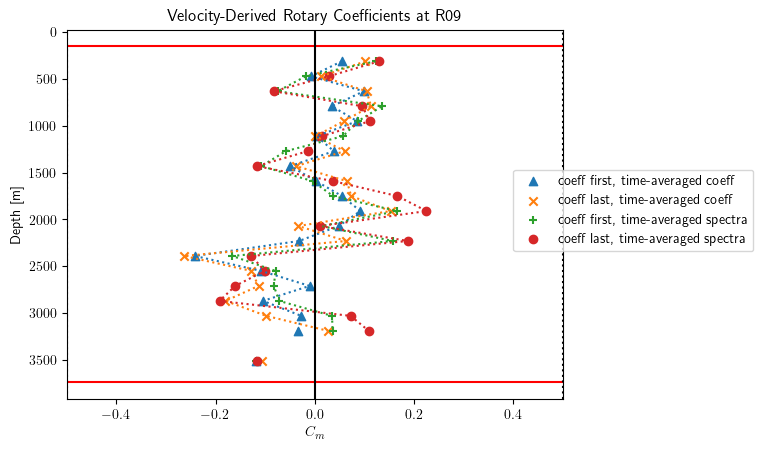

In [15]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r09_cmf_tc_v,depth,label='coeff first, time-averaged coeff', marker='^')
plt.scatter(r09_cml_tc_v,depth,label='coeff last, time-averaged coeff', marker='x')
plt.scatter(r09_cmf_ts_v,depth,label='coeff first, time-averaged spectra', marker='+')
plt.scatter(r09_cml_ts_v,depth,label='coeff last, time-averaged spectra', marker='o')

plt.plot(r09_cmf_tc_v,depth,ls=':')
plt.plot(r09_cml_tc_v,depth,ls=':')
plt.plot(r09_cmf_ts_v,depth,ls=':')
plt.plot(r09_cml_ts_v,depth,ls=':')

plt.xlim([-.5,0.5])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
plt.axhline(deepest_r09,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Velocity-Derived Rotary Coefficients at R09')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.9,0.4])

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


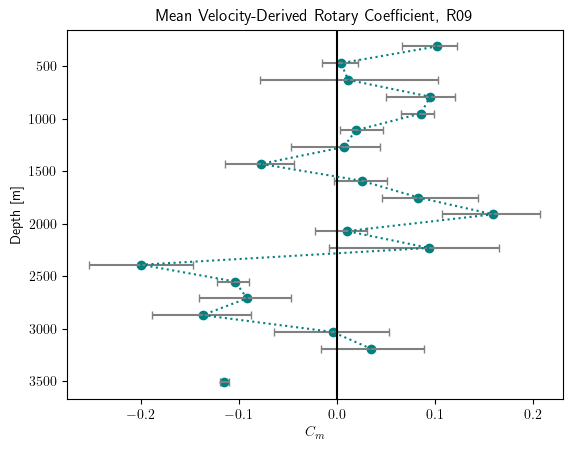

In [510]:
r09_mean_v, r09_mean_v_ci, r09_mean_v_stderr = mean_bootstrap(r09_cmf_tc_v, r09_cml_tc_v, r09_cmf_ts_v, r09_cml_ts_v)

plt.scatter(r09_mean_v, depth, c='teal')
plt.errorbar(r09_mean_v,depth,xerr=r09_mean_v_ci,fmt='teal',ls=':',capsize=3,ecolor='gray')
plt.axvline(0,c='k')
plt.title('Mean Velocity-Derived Rotary Coefficient, R09')
plt.ylabel('Depth [m]')
plt.xlabel(r'$C_m$')
plt.gca().invert_yaxis()

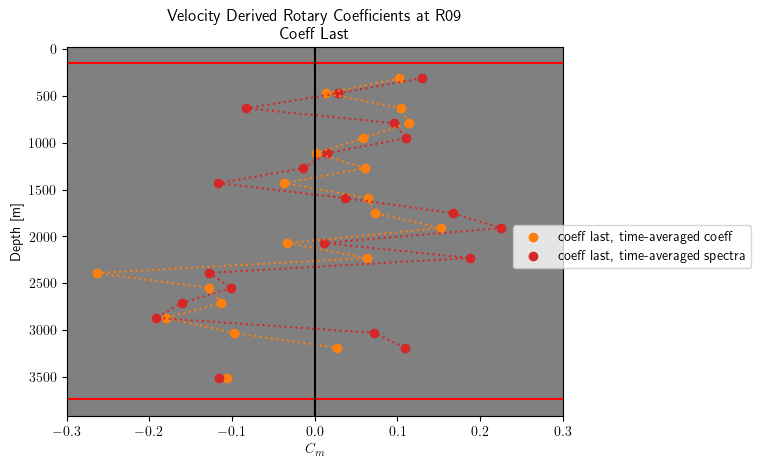

In [378]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r09_cml_tc_v,depth,label='coeff last, time-averaged coeff',c='tab:orange')
plt.scatter(r09_cml_ts_v,depth,label='coeff last, time-averaged spectra',c='tab:red')

plt.plot(r09_cml_tc_v,depth,ls=':',c='tab:orange')
plt.plot(r09_cml_ts_v,depth,ls=':',c='tab:red')

plt.xlim([-.3,0.3])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
plt.axhline(deepest_r09,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Velocity Derived Rotary Coefficients at R09\n Coeff Last')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.9,0.4])

plt.gca().set_facecolor('grey')

### Shear at R09

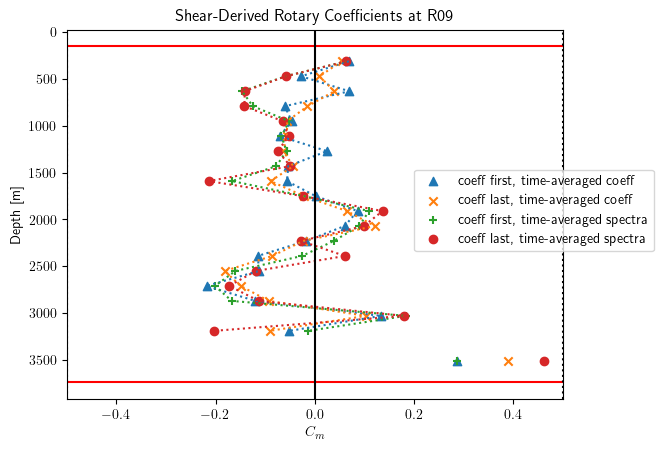

In [12]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r09_cmf_tc_s,depth,label='coeff first, time-averaged coeff',marker='^')
plt.scatter(r09_cml_tc_s,depth,label='coeff last, time-averaged coeff',marker='x')
plt.scatter(r09_cmf_ts_s,depth,label='coeff first, time-averaged spectra',marker='+')
plt.scatter(r09_cml_ts_s,depth,label='coeff last, time-averaged spectra',marker='o')

plt.plot(r09_cmf_tc_s,depth,ls=':')
plt.plot(r09_cml_tc_s,depth,ls=':')
plt.plot(r09_cmf_ts_s,depth,ls=':')
plt.plot(r09_cml_ts_s,depth,ls=':')

plt.xlim([-0.5,0.5])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
plt.axhline(deepest_r09,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Shear-Derived Rotary Coefficients at R09')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.7,0.4])

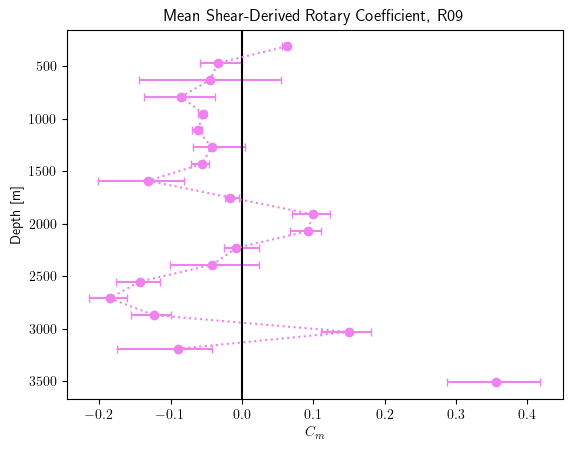

In [511]:
r09_mean_s, r09_mean_s_ci, r09_mean_s_stderr = mean_bootstrap(r09_cmf_tc_s, r09_cml_tc_s, r09_cmf_ts_s, r09_cml_ts_s)

plt.scatter(r09_mean_s, depth, c='violet')
plt.errorbar(r09_mean_s,depth,xerr=r09_mean_s_ci,fmt='violet',ls=':',capsize=3)
plt.axvline(0,c='k')
plt.title('Mean Shear-Derived Rotary Coefficient, R09')
plt.ylabel('Depth [m]')
plt.xlabel(r'$C_m$')
plt.gca().invert_yaxis()

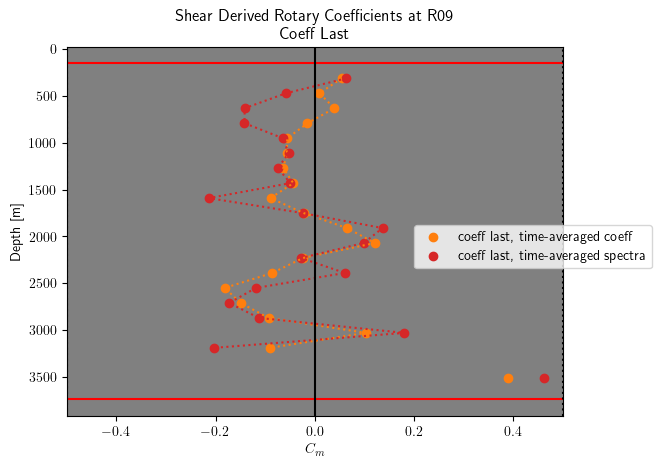

In [380]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r09_cml_tc_s,depth,label='coeff last, time-averaged coeff',c='tab:orange')
plt.scatter(r09_cml_ts_s,depth,label='coeff last, time-averaged spectra',c='tab:red')

plt.plot(r09_cml_tc_s,depth,ls=':',c='tab:orange')
plt.plot(r09_cml_ts_s,depth,ls=':',c='tab:red')

plt.xlim([-0.5,0.5])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
plt.axhline(deepest_r09,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Shear Derived Rotary Coefficients at R09\n Coeff Last')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.7,0.4])

plt.gca().set_facecolor('grey')

### Velocity and Shear at R09

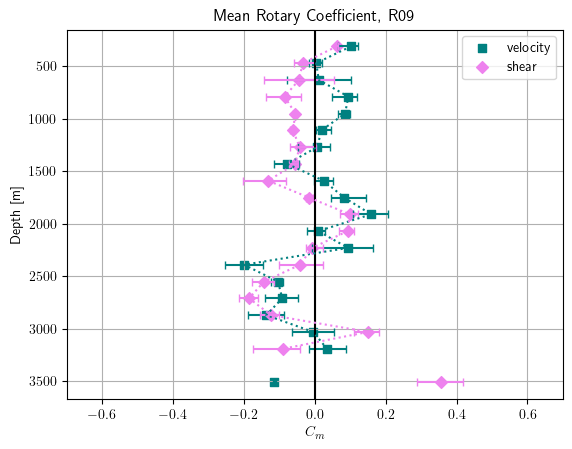

In [651]:
plt.scatter(r09_mean_v, depth, c='teal',label='velocity',marker='s')
plt.errorbar(r09_mean_v,depth,xerr=r09_mean_v_ci,fmt='teal',ls=':',capsize=3)
plt.scatter(r09_mean_s, depth, c='violet', label='shear',marker='D')
plt.errorbar(r09_mean_s,depth,xerr=r09_mean_s_ci,fmt='violet',ls=':',capsize=3)

scale = 0

plt.axvline(0,c='k')
plt.legend()
plt.title('Mean Rotary Coefficient, R09')
plt.ylabel('Depth [m]')
plt.xlabel(r'$C_m$')
plt.xlim([-0.7,0.7])
plt.grid()
plt.gca().invert_yaxis()

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


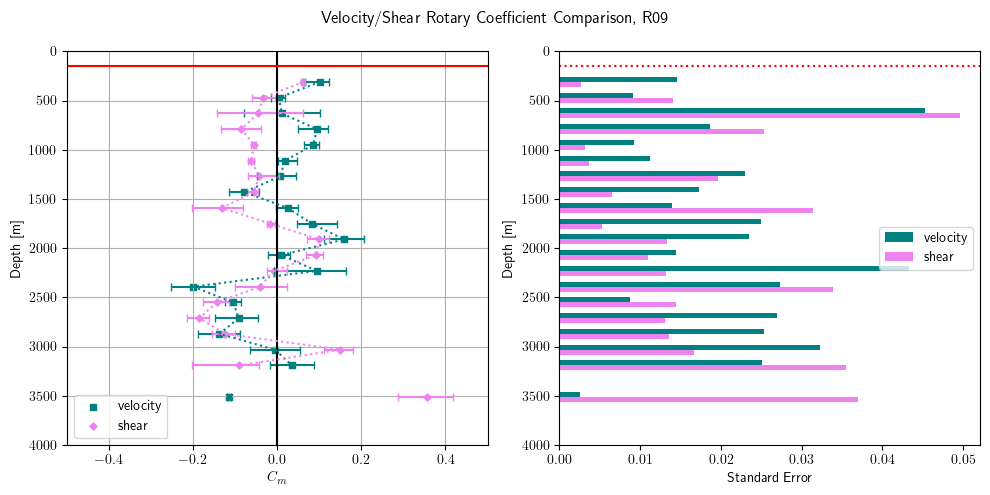

In [17]:
plot_vs(r09_cmf_tc_v, r09_cml_tc_v, r09_cmf_ts_v, r09_cml_ts_v, r09_cmf_tc_s, r09_cml_tc_s, r09_cmf_ts_s, r09_cml_ts_s, depth)
plt.gcf().set_size_inches(10,5)
plt.suptitle('Velocity/Shear Rotary Coefficient Comparison, R09')
plt.tight_layout()

### Velocity Shear Comparison R08

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


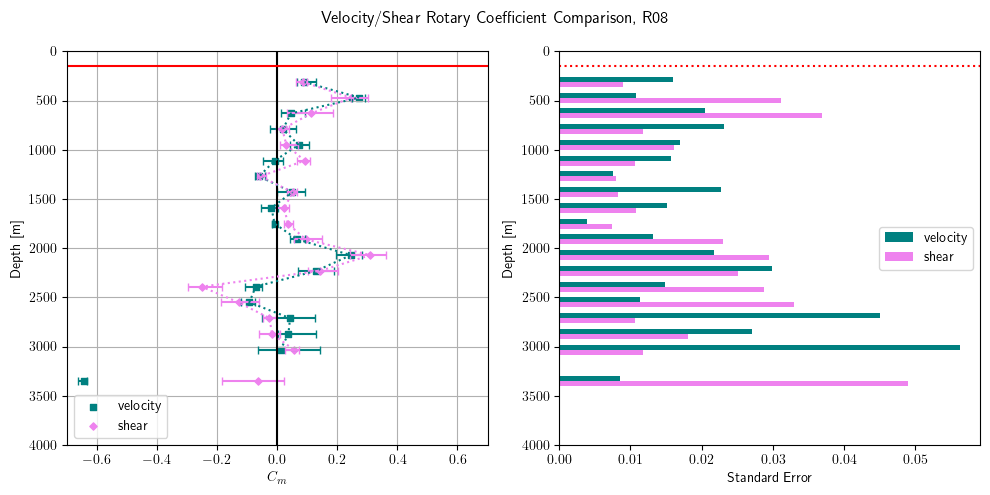

In [660]:
plot_vs(r08_cmf_tc_v, r08_cml_tc_v, r08_cmf_ts_v, r08_cml_ts_v, r08_cmf_tc_s, r08_cml_tc_s, r08_cmf_ts_s, r08_cml_ts_s, depth)
plt.gcf().set_size_inches(10,5)
plt.suptitle('Velocity/Shear Rotary Coefficient Comparison, R08')
plt.tight_layout()

### Velocity Shear Comparison R10

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


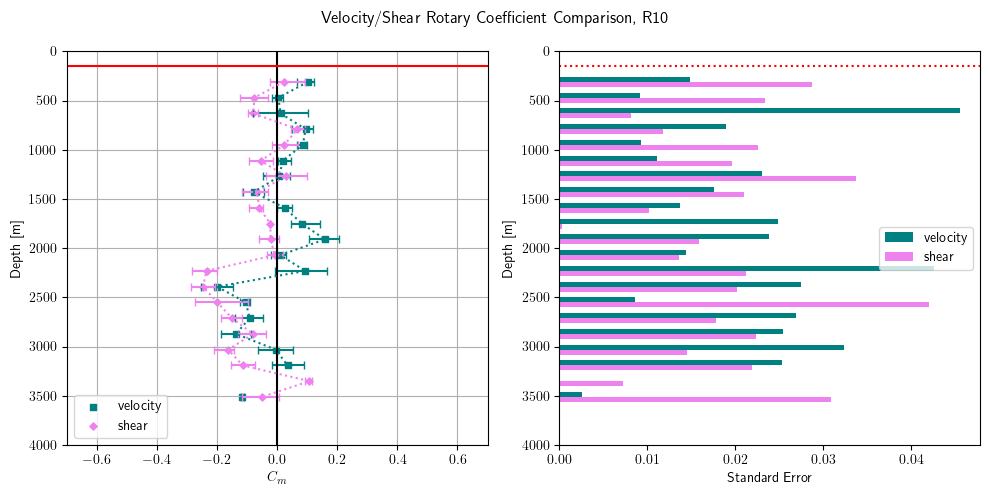

In [661]:
plot_vs(r10_cmf_tc_v, r10_cml_tc_v, r10_cmf_ts_v, r10_cml_ts_v, r10_cmf_tc_s, r10_cml_tc_s, r10_cmf_ts_s, r10_cml_ts_s, depth)
plt.gcf().set_size_inches(10,5)
plt.suptitle('Velocity/Shear Rotary Coefficient Comparison, R10')
plt.tight_layout()

### Velocity at R16

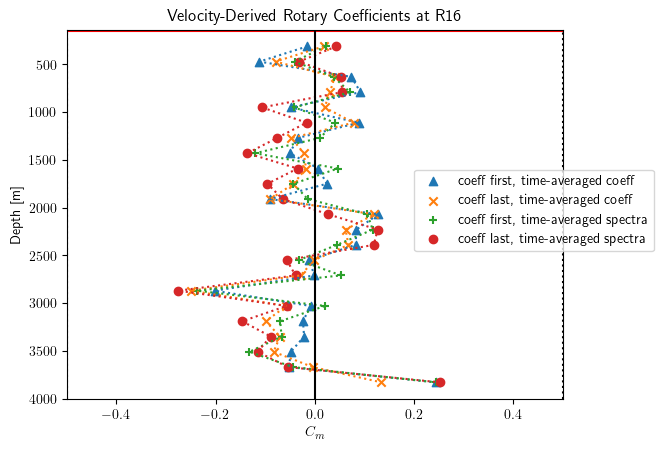

In [18]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r16_cmf_tc_v,depth,label='coeff first, time-averaged coeff', marker='^')
plt.scatter(r16_cml_tc_v,depth,label='coeff last, time-averaged coeff', marker='x')
plt.scatter(r16_cmf_ts_v,depth,label='coeff first, time-averaged spectra', marker='+')
plt.scatter(r16_cml_ts_v,depth,label='coeff last, time-averaged spectra', marker='o')

plt.plot(r16_cmf_tc_v,depth,ls=':')
plt.plot(r16_cml_tc_v,depth,ls=':')
plt.plot(r16_cmf_ts_v,depth,ls=':')
plt.plot(r16_cml_ts_v,depth,ls=':')

plt.xlim([-0.5,0.5])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
#plt.axhline(deepest_r09,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0003)
plt.gca().invert_yaxis()
plt.title('Velocity-Derived Rotary Coefficients at R16')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.7,0.4])

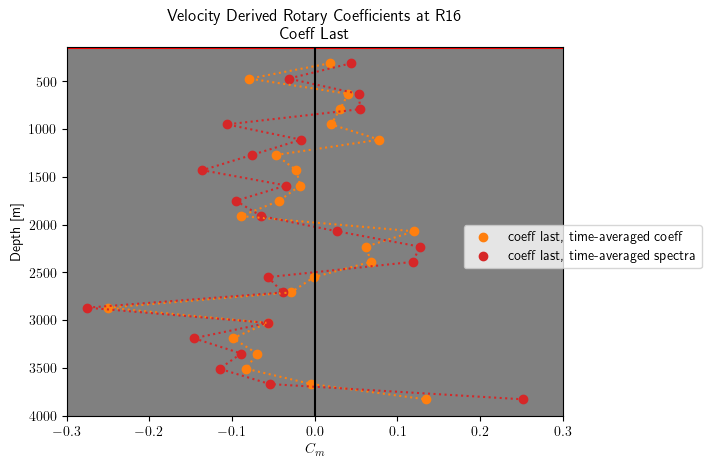

In [383]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r16_cml_tc_v,depth,label='coeff last, time-averaged coeff',c='tab:orange')
plt.scatter(r16_cml_ts_v,depth,label='coeff last, time-averaged spectra',c='tab:red')

plt.plot(r16_cml_tc_v,depth,ls=':',c='tab:orange')
plt.plot(r16_cml_ts_v,depth,ls=':',c='tab:red')

plt.xlim([-0.3,0.3])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
#plt.axhline(deepest_r09,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0003)
plt.gca().invert_yaxis()
plt.title('Velocity Derived Rotary Coefficients at R16\n Coeff Last')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.8,0.4])

plt.gca().set_facecolor('grey')

### Shear at R16

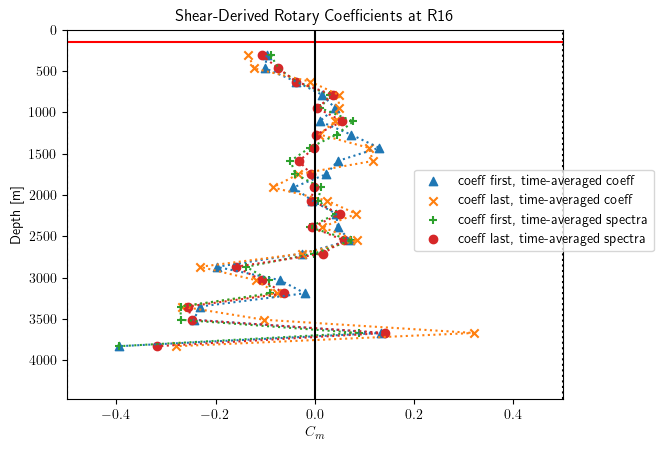

In [14]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r16_cmf_tc_s,depth,label='coeff first, time-averaged coeff', marker='^')
plt.scatter(r16_cml_tc_s,depth,label='coeff last, time-averaged coeff', marker='x')
plt.scatter(r16_cmf_ts_s,depth,label='coeff first, time-averaged spectra', marker='+')
plt.scatter(r16_cml_ts_s,depth,label='coeff last, time-averaged spectra', marker='o')

plt.plot(r16_cmf_tc_s,depth,ls=':')
plt.plot(r16_cml_tc_s,depth,ls=':')
plt.plot(r16_cmf_ts_s,depth,ls=':')
plt.plot(r16_cml_ts_s,depth,ls=':')

plt.xlim([-0.5,0.5])
plt.ylim([0,np.max(depth)])
plt.axhline(150,c='r')
#plt.axhline(deepest_r16,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Shear-Derived Rotary Coefficients at R16')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.7,0.4])

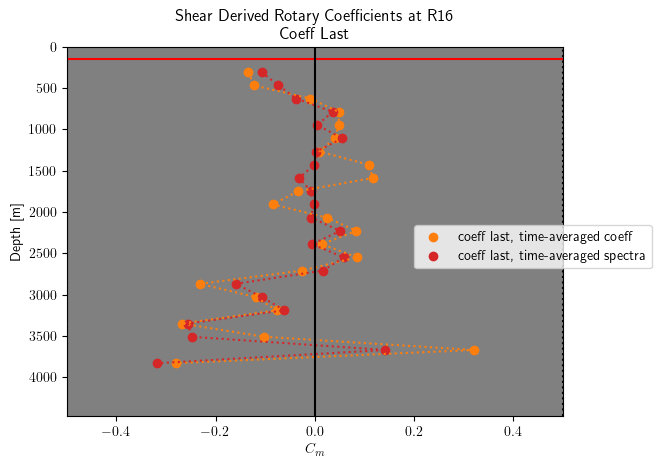

In [386]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r16_cml_tc_s,depth,label='coeff last, time-averaged coeff',c='tab:orange')
plt.scatter(r16_cml_ts_s,depth,label='coeff last, time-averaged spectra',c='tab:red')

plt.plot(r16_cml_tc_s,depth,ls=':',c='tab:orange')
plt.plot(r16_cml_ts_s,depth,ls=':',c='tab:red')

plt.xlim([-0.5,0.5])
plt.ylim([0,np.max(depth)])
plt.axhline(150,c='r')
#plt.axhline(deepest_r16,c='r')
plt.axvline(0.5, c='k',ls=':')
plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Shear Derived Rotary Coefficients at R16\n Coeff Last')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.7,0.4])

plt.gca().set_facecolor('grey')

### Velocity Shear Comparison R16

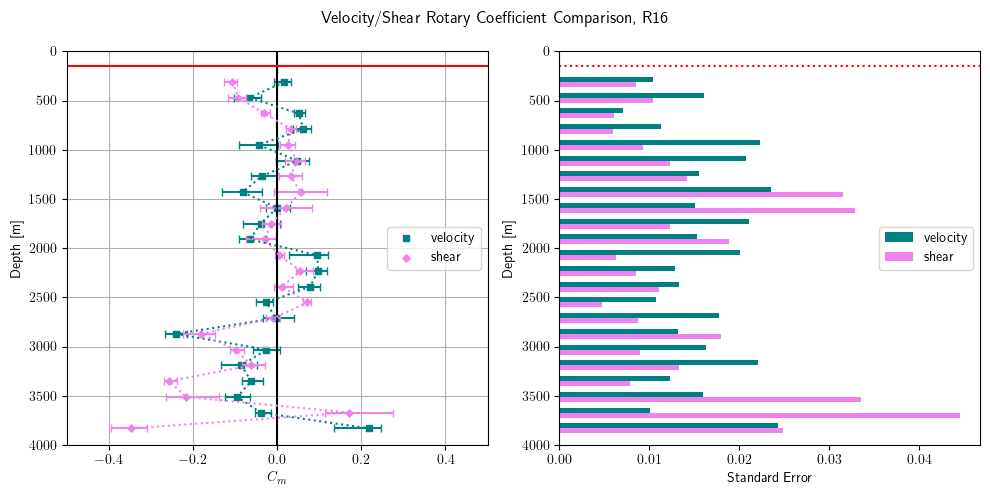

In [19]:
plot_vs(r16_cmf_tc_v, r16_cml_tc_v, r16_cmf_ts_v, r16_cml_ts_v, r16_cmf_tc_s, r16_cml_tc_s, r16_cmf_ts_s, r16_cml_ts_s, depth)
plt.gcf().set_size_inches(10,5)
plt.suptitle('Velocity/Shear Rotary Coefficient Comparison, R16')
plt.tight_layout()

### Velocity Shear Comparison R15

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


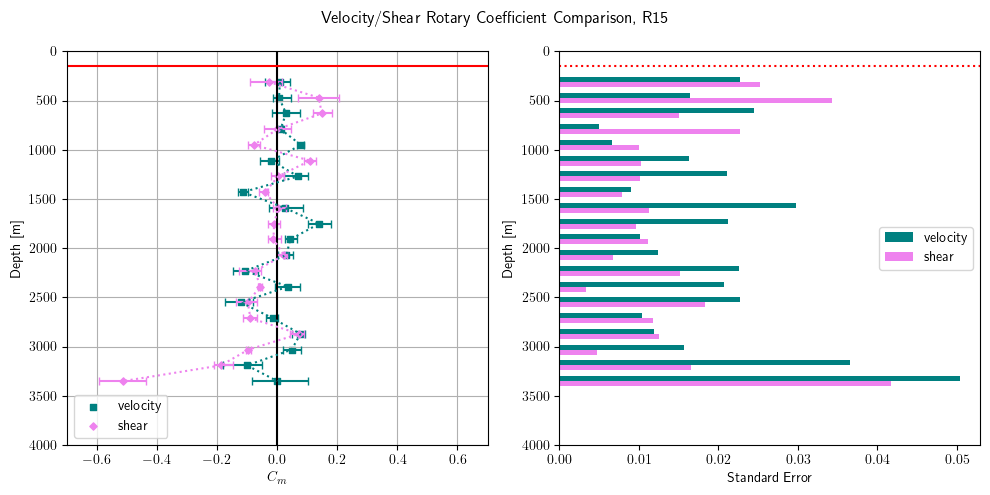

In [658]:
plot_vs(r15_cmf_tc_v, r15_cml_tc_v, r15_cmf_ts_v, r15_cml_ts_v, r15_cmf_tc_s, r15_cml_tc_s, r15_cmf_ts_s, r15_cml_ts_s, depth)
plt.gcf().set_size_inches(10,5)
plt.suptitle('Velocity/Shear Rotary Coefficient Comparison, R15')
plt.tight_layout()

### Velocity Shear Comparison R17

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


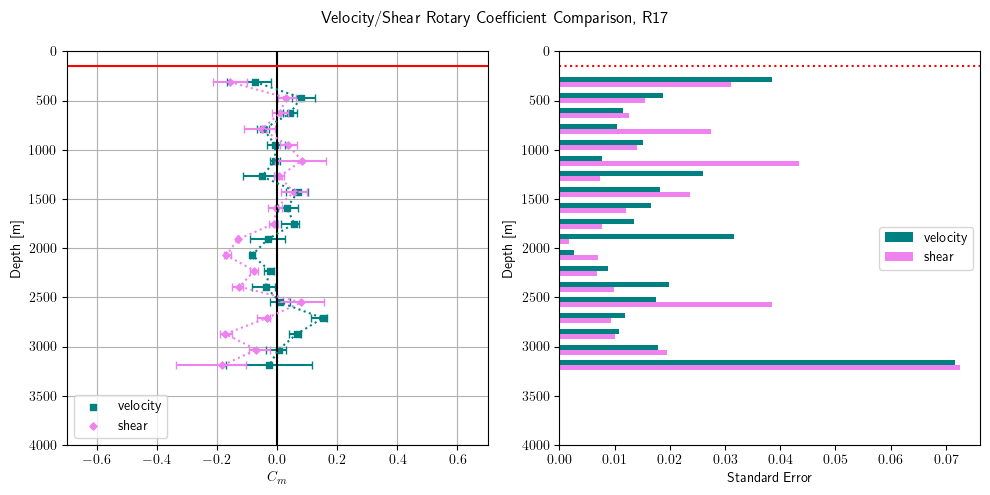

In [659]:
plot_vs(r17_cmf_tc_v, r17_cml_tc_v, r17_cmf_ts_v, r17_cml_ts_v, r17_cmf_tc_s, r17_cml_tc_s, r17_cmf_ts_s, r17_cml_ts_s, depth)
plt.gcf().set_size_inches(10,5)
plt.suptitle('Velocity/Shear Rotary Coefficient Comparison, R17')
plt.tight_layout()

### Velocity - Shear Difference at R09

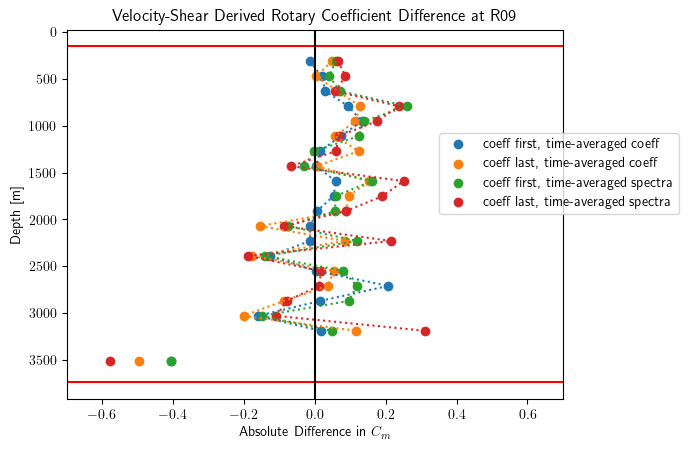

In [323]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r09_cmf_tc_v - r09_cmf_tc_s,depth,label='coeff first, time-averaged coeff')
plt.scatter(r09_cml_tc_v - r09_cml_tc_s,depth,label='coeff last, time-averaged coeff')
plt.scatter(r09_cmf_ts_v - r09_cmf_ts_s,depth,label='coeff first, time-averaged spectra')
plt.scatter(r09_cml_ts_v - r09_cml_ts_s,depth,label='coeff last, time-averaged spectra')

plt.plot(r09_cmf_tc_v - r09_cmf_tc_s,depth,ls=':')
plt.plot(r09_cml_tc_v - r09_cml_tc_s,depth,ls=':')
plt.plot(r09_cmf_ts_v - r09_cmf_ts_s,depth,ls=':')
plt.plot(r09_cml_ts_v - r09_cml_ts_s,depth,ls=':')

plt.xlim([-0.7,0.7])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
plt.axhline(deepest_r09,c='r')
#plt.axvline(0.5, c='k',ls=':')
#plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Velocity-Shear Derived Rotary Coefficient Difference at R09')
plt.xlabel(r'Absolute Difference in $C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[0.75,0.5])

### Velocity - Shear Difference R16

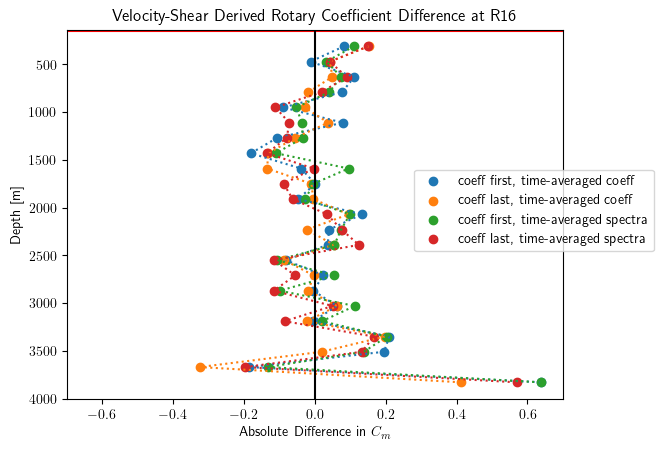

In [327]:
# vars [r09_cmf_tc_v, r09_cmf_ts_v, r09_cml_tc_v, r09_cml_ts_v]

plt.scatter(r16_cmf_tc_v - r16_cmf_tc_s,depth,label='coeff first, time-averaged coeff')
plt.scatter(r16_cml_tc_v - r16_cml_tc_s,depth,label='coeff last, time-averaged coeff')
plt.scatter(r16_cmf_ts_v - r16_cmf_ts_s,depth,label='coeff first, time-averaged spectra')
plt.scatter(r16_cml_ts_v - r16_cml_ts_s,depth,label='coeff last, time-averaged spectra')

plt.plot(r16_cmf_tc_v - r16_cmf_tc_s,depth,ls=':')
plt.plot(r16_cml_tc_v - r16_cml_tc_s,depth,ls=':')
plt.plot(r16_cmf_ts_v - r16_cmf_ts_s,depth,ls=':')
plt.plot(r16_cml_ts_v - r16_cml_ts_s,depth,ls=':')

plt.xlim([-0.7,0.7])
#plt.ylim([1000,2000])
plt.axhline(150,c='r')
#plt.axhline(deepest_r16,c='r')
#plt.axvline(0.5, c='k',ls=':')
#plt.axvline(-0.5, c='k',ls=':')
plt.axvline(0, c='k',)
#plt.gca().set_aspect(0.0006)
plt.gca().invert_yaxis()
plt.title('Velocity-Shear Derived Rotary Coefficient Difference at R16')
plt.xlabel(r'Absolute Difference in $C_m$')
plt.ylabel('Depth [m]')
plt.legend(loc=[.7,0.4])

# Standard vs 450m Window 

In [30]:
# load 450m window standard cutoff data

r08_450_avg_coeff   = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_coeff/R08_w450_c60_180_avg_coeff.nc')
r08_450_avg_spectra = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_spectra/R08_w450_c60_180_avg_spectra.nc')

r09_450_avg_coeff   = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_coeff/R09_w450_c60_180_avg_coeff.nc')
r09_450_avg_spectra = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_spectra/R09_w450_c60_180_avg_spectra.nc')

r10_450_avg_coeff   = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_coeff/R10_w450_c60_180_avg_coeff.nc')
r10_450_avg_spectra = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_spectra/R10_w450_c60_180_avg_spectra.nc')

r15_450_avg_coeff   = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_coeff/R15_w450_c60_180_avg_coeff.nc')
r15_450_avg_spectra = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_spectra/R15_w450_c60_180_avg_spectra.nc')

r16_450_avg_coeff   = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_coeff/R16_w450_c60_180_avg_coeff.nc')
r16_450_avg_spectra = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_spectra/R16_w450_c60_180_avg_spectra.nc')

r17_450_avg_coeff   = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_coeff/R17_w450_c60_180_avg_coeff.nc')
r17_450_avg_spectra = xr.open_dataset(data_dir+'window_450m_cutoff_60_180_avg_spectra/R17_w450_c60_180_avg_spectra.nc')

In [31]:
# time average coefficients 

r09_450_avg_coeff = r09_450_avg_coeff.rotary_coeff.mean(dim='profile_number')
r16_450_avg_coeff = r16_450_avg_coeff.rotary_coeff.mean(dim='profile_number')

r08_450_avg_coeff = r08_450_avg_coeff.rotary_coeff.mean(dim='profile_number')
r15_450_avg_coeff = r15_450_avg_coeff.rotary_coeff.mean(dim='profile_number')

r10_450_avg_coeff = r10_450_avg_coeff.rotary_coeff.mean(dim='profile_number')
r17_450_avg_coeff = r17_450_avg_coeff.rotary_coeff.mean(dim='profile_number')

In [32]:
r08_450_cmf_tc_v = r08_450_avg_coeff.sel(coeff_method='coeff_first', variable='velocity')
r08_450_cml_tc_v = r08_450_avg_coeff.sel(coeff_method='coeff_last', variable='velocity')
r08_450_cmf_ts_v = r08_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r08_450_cml_ts_v = r08_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r08_450_cmf_tc_s = r08_450_avg_coeff.sel(coeff_method='coeff_first', variable='shear')
r08_450_cml_tc_s = r08_450_avg_coeff.sel(coeff_method='coeff_last', variable='shear')
r08_450_cmf_ts_s = r08_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r08_450_cml_ts_s = r08_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_v = r09_450_avg_coeff.sel(coeff_method='coeff_first', variable='velocity')
r09_450_cml_tc_v = r09_450_avg_coeff.sel(coeff_method='coeff_last', variable='velocity')
r09_450_cmf_ts_v = r09_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_v = r09_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_s = r09_450_avg_coeff.sel(coeff_method='coeff_first', variable='shear')
r09_450_cml_tc_s = r09_450_avg_coeff.sel(coeff_method='coeff_last', variable='shear')
r09_450_cmf_ts_s = r09_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_s = r09_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r10_450_cmf_tc_v = r10_450_avg_coeff.sel(coeff_method='coeff_first', variable='velocity')
r10_450_cml_tc_v = r10_450_avg_coeff.sel(coeff_method='coeff_last', variable='velocity')
r10_450_cmf_ts_v = r10_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r10_450_cml_ts_v = r10_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r10_450_cmf_tc_s = r10_450_avg_coeff.sel(coeff_method='coeff_first', variable='shear')
r10_450_cml_tc_s = r10_450_avg_coeff.sel(coeff_method='coeff_last', variable='shear')
r10_450_cmf_ts_s = r10_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r10_450_cml_ts_s = r10_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r15_450_cmf_tc_v = r15_450_avg_coeff.sel(coeff_method='coeff_first', variable='velocity')
r15_450_cml_tc_v = r15_450_avg_coeff.sel(coeff_method='coeff_last', variable='velocity')
r15_450_cmf_ts_v = r15_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r15_450_cml_ts_v = r15_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r15_450_cmf_tc_s = r15_450_avg_coeff.sel(coeff_method='coeff_first', variable='shear')
r15_450_cml_tc_s = r15_450_avg_coeff.sel(coeff_method='coeff_last', variable='shear')
r15_450_cmf_ts_s = r15_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r15_450_cml_ts_s = r15_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_v = r16_450_avg_coeff.sel(coeff_method='coeff_first', variable='velocity')
r16_450_cml_tc_v = r16_450_avg_coeff.sel(coeff_method='coeff_last', variable='velocity')
r16_450_cmf_ts_v = r16_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_v = r16_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_s = r16_450_avg_coeff.sel(coeff_method='coeff_first', variable='shear')
r16_450_cml_tc_s = r16_450_avg_coeff.sel(coeff_method='coeff_last', variable='shear')
r16_450_cmf_ts_s = r16_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_s = r16_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

r17_450_cmf_tc_v = r17_450_avg_coeff.sel(coeff_method='coeff_first', variable='velocity')
r17_450_cml_tc_v = r17_450_avg_coeff.sel(coeff_method='coeff_last', variable='velocity')
r17_450_cmf_ts_v = r17_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_first')
r17_450_cml_ts_v = r17_450_avg_spectra.velocity_derived_Rc.sel(comp_method='coeff_last')

r17_450_cmf_tc_s = r17_450_avg_coeff.sel(coeff_method='coeff_first', variable='shear')
r17_450_cml_tc_s = r17_450_avg_coeff.sel(coeff_method='coeff_last', variable='shear')
r17_450_cmf_ts_s = r17_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_first')
r17_450_cml_ts_s = r17_450_avg_spectra.shear_derived_Rc.sel(comp_method='coeff_last')

In [33]:
depth450 = r16_450_cmf_ts_v.depth

### R09 Window Comparison
### Velocity

In [397]:
import scipy

In [398]:
def mean_bootstrap(m1,m2,m3,m4):
    size = m1.shape[0]
    arr = np.empty((size, 4))
    arr[:,0] = m1
    arr[:,1] = m2
    arr[:,2] = m3
    arr[:,3] = m4
    
    mean = arr.mean(axis=1)
    ci = np.empty((size,2))
    
    for d in range(size):
        interval = scipy.stats.bootstrap((arr[d,:],),np.mean).confidence_interval
        lower = interval[0]
        upper = interval[1]
        
        ci[d,0] = lower
        ci[d,1] = upper
    
    return (mean, ci)
    

In [399]:
test = mean_bootstrap(r09_450_cmf_tc_v,r09_450_cml_tc_v,r09_450_cmf_ts_v,r09_450_cml_ts_v)

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


In [390]:
r09_450_cmf_tc_v.shape[0]

19

Text(0, 0.5, 'Depth [m]')

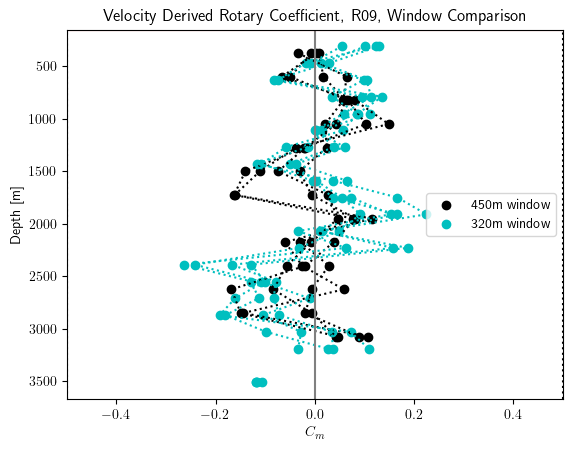

In [662]:
plt.scatter(r09_450_cmf_tc_v, depth450,c='k',label='450m window')
plt.scatter(r09_450_cml_tc_v, depth450,c='k')
plt.scatter(r09_450_cmf_ts_v, depth450,c='k')
plt.scatter(r09_450_cml_ts_v, depth450,c='k')

plt.plot(r09_450_cmf_tc_v, depth450, ls=':',c='k')
plt.plot(r09_450_cml_tc_v, depth450, ls=':',c='k')
plt.plot(r09_450_cmf_ts_v, depth450, ls=':',c='k')
plt.plot(r09_450_cml_ts_v, depth450, ls=':',c='k')

plt.scatter(r09_cmf_tc_v, depth,c='c',label='320m window')
plt.scatter(r09_cml_tc_v, depth,c='c')
plt.scatter(r09_cmf_ts_v, depth,c='c')
plt.scatter(r09_cml_ts_v, depth,c='c')

plt.plot(r09_cmf_tc_v, depth, ls=':',c='c')
plt.plot(r09_cml_tc_v, depth, ls=':',c='c')
plt.plot(r09_cmf_ts_v, depth, ls=':',c='c')
plt.plot(r09_cml_ts_v, depth, ls=':',c='c')

plt.xlim([-0.5,0.5])
plt.axvline(0.5, ls=':', c='k')
plt.axvline(-0.5, ls=':', c='k')
plt.axvline(0, c='grey')
plt.axhline(150,c='r')
plt.gca().invert_yaxis()
plt.legend(loc='right')
plt.title('Velocity Derived Rotary Coefficient, R09, Window Comparison')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')

Text(0.5, 1.0, 'Window Size Comparison of Velocity-Derived Rotary Coefficient, R09')

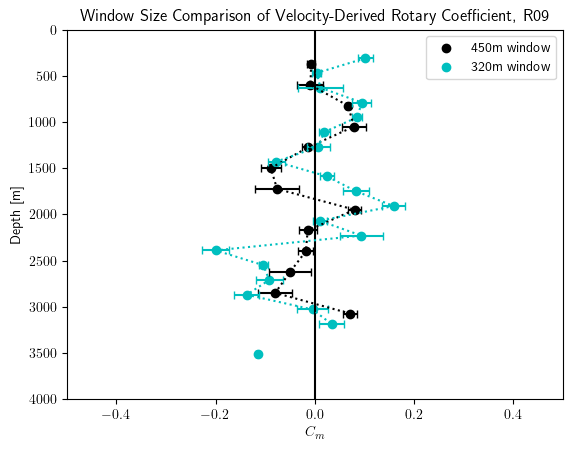

In [687]:
r09_mean_450_v, r09_mean_450_v_ci, r09_mean_450_v_stderr = mean_bootstrap(r09_450_cmf_tc_v,r09_450_cml_tc_v,
                                                                         r09_450_cmf_ts_v,r09_450_cml_ts_v)

r09_mean_v, r09_mean_v_ci, r09_mean_v_stderr = mean_bootstrap(r09_cmf_tc_v,r09_cml_tc_v,
                                                                         r09_cmf_ts_v,r09_cml_ts_v)

plt.scatter(r09_mean_450_v, depth450,c='k',label='450m window')
plt.errorbar(r09_mean_450_v, depth450, xerr = r09_mean_450_v_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r09_mean_v, depth,c='c',label='320m window')
plt.errorbar(r09_mean_v, depth, xerr = r09_mean_v_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Velocity-Derived Rotary Coefficient, R09')

### R08 Window Comparison Velocity

Text(0.5, 1.0, 'Window Size Comparison of Velocity-Derived Rotary Coefficient, R08')

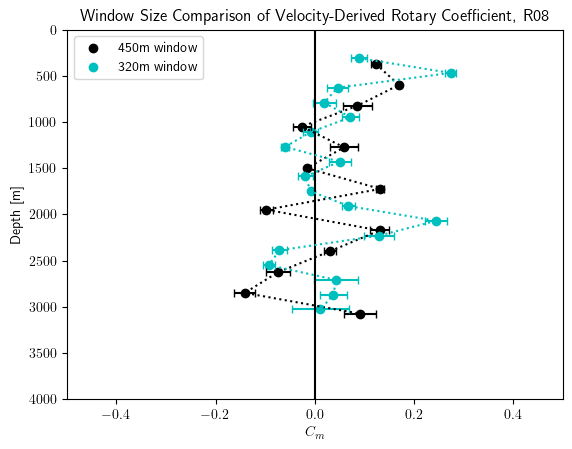

In [688]:
r08_mean_450_v, r08_mean_450_v_ci, r08_mean_450_v_stderr = mean_bootstrap(r08_450_cmf_tc_v,r08_450_cml_tc_v,
                                                                         r08_450_cmf_ts_v,r08_450_cml_ts_v)

r08_mean_v, r08_mean_v_ci, r08_mean_v_stderr = mean_bootstrap(r08_cmf_tc_v,r08_cml_tc_v,
                                                                         r08_cmf_ts_v,r08_cml_ts_v)

plt.scatter(r08_mean_450_v, depth450,c='k',label='450m window')
plt.errorbar(r08_mean_450_v, depth450, xerr = r08_mean_450_v_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r08_mean_v, depth,c='c',label='320m window')
plt.errorbar(r08_mean_v, depth, xerr = r08_mean_v_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Velocity-Derived Rotary Coefficient, R08')

### R10 Window Comparison Velocity

Text(0.5, 1.0, 'Window Size Comparison of Velocity-Derived Rotary Coefficient, R10')

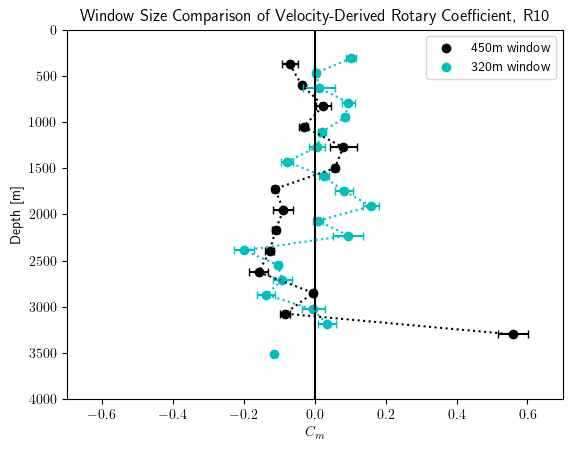

In [689]:
r10_mean_450_v, r10_mean_450_v_ci, r10_mean_450_v_stderr = mean_bootstrap(r10_450_cmf_tc_v,r10_450_cml_tc_v,
                                                                         r10_450_cmf_ts_v,r10_450_cml_ts_v)

r10_mean_v, r10_mean_v_ci, r10_mean_v_stderr = mean_bootstrap(r10_cmf_tc_v,r10_cml_tc_v,
                                                                         r10_cmf_ts_v,r10_cml_ts_v)

plt.scatter(r10_mean_450_v, depth450,c='k',label='450m window')
plt.errorbar(r10_mean_450_v, depth450, xerr = r10_mean_450_v_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r10_mean_v, depth,c='c',label='320m window')
plt.errorbar(r10_mean_v, depth, xerr = r10_mean_v_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.7,0.7])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Velocity-Derived Rotary Coefficient, R10')

### R09 Window Comparison
### Shear

Text(0, 0.5, 'Depth [m]')

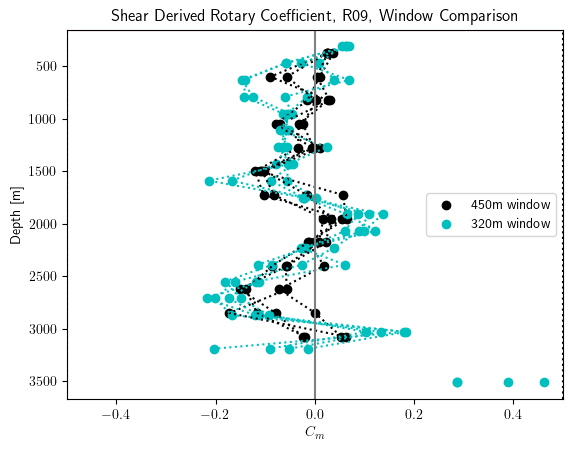

In [216]:
plt.scatter(r09_450_cmf_tc_s, depth450,c='k',label='450m window')
plt.scatter(r09_450_cml_tc_s, depth450,c='k')
plt.scatter(r09_450_cmf_ts_s, depth450,c='k')
plt.scatter(r09_450_cml_ts_s, depth450,c='k')

plt.plot(r09_450_cmf_tc_s, depth450, ls=':',c='k')
plt.plot(r09_450_cml_tc_s, depth450, ls=':',c='k')
plt.plot(r09_450_cmf_ts_s, depth450, ls=':',c='k')
plt.plot(r09_450_cml_ts_s, depth450, ls=':',c='k')

plt.scatter(r09_cmf_tc_s, depth,c='c',label='320m window')
plt.scatter(r09_cml_tc_s, depth,c='c')
plt.scatter(r09_cmf_ts_s, depth,c='c')
plt.scatter(r09_cml_ts_s, depth,c='c')

plt.plot(r09_cmf_tc_s, depth, ls=':',c='c')
plt.plot(r09_cml_tc_s, depth, ls=':',c='c')
plt.plot(r09_cmf_ts_s, depth, ls=':',c='c')
plt.plot(r09_cml_ts_s, depth, ls=':',c='c')

plt.xlim([-0.5,0.5])
plt.axvline(0.5, ls=':', c='k')
plt.axvline(-0.5, ls=':', c='k')
plt.axvline(0, c='grey')
plt.axhline(150,c='r')
plt.gca().invert_yaxis()
plt.legend(loc='right')
plt.title('Shear Derived Rotary Coefficient, R09, Window Comparison')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Window Size Comparison of Shear-Derived Rotary Coefficient, R09')

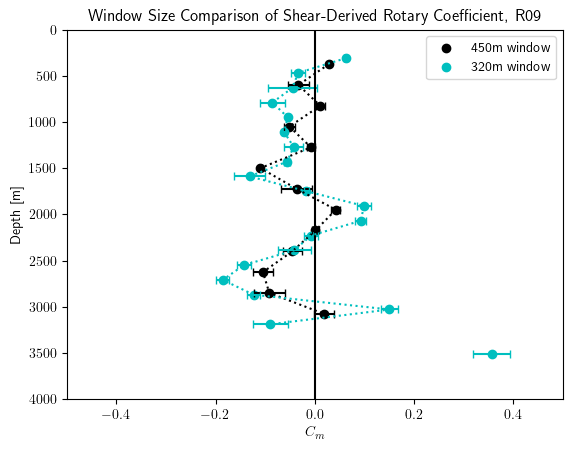

In [691]:
r09_mean_450_s, r09_mean_450_s_ci, r09_mean_450_s_stderr = mean_bootstrap(r09_450_cmf_tc_s,r09_450_cml_tc_s,
                                                                         r09_450_cmf_ts_s,r09_450_cml_ts_s)

r09_mean_s, r09_mean_s_ci, r09_mean_s_stderr = mean_bootstrap(r09_cmf_tc_s,r09_cml_tc_s,
                                                                         r09_cmf_ts_s,r09_cml_ts_s)

plt.scatter(r09_mean_450_s, depth450,c='k',label='450m window')
plt.errorbar(r09_mean_450_s, depth450, xerr = r09_mean_450_s_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r09_mean_s, depth,c='c',label='320m window')
plt.errorbar(r09_mean_s, depth, xerr = r09_mean_s_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Shear-Derived Rotary Coefficient, R09')

### R08 Window Comparison Shear

Text(0.5, 1.0, 'Window Size Comparison of Shear-Derived Rotary Coefficient, R08')

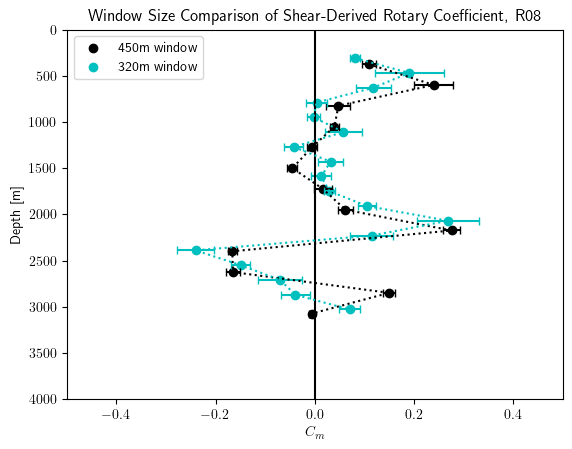

In [692]:
r08_mean_450_s, r08_mean_450_s_ci, r08_mean_450_s_stderr = mean_bootstrap(r08_450_cmf_tc_s,r08_450_cml_tc_s,
                                                                         r08_450_cmf_ts_s,r08_450_cml_ts_s)

r08_mean_s, r08_mean_s_ci, r08_mean_s_stderr = mean_bootstrap(r09_cmf_tc_s,r08_cml_tc_s,
                                                                         r08_cmf_ts_s,r08_cml_ts_s)

plt.scatter(r08_mean_450_s, depth450,c='k',label='450m window')
plt.errorbar(r08_mean_450_s, depth450, xerr = r08_mean_450_s_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r08_mean_s, depth,c='c',label='320m window')
plt.errorbar(r08_mean_s, depth, xerr = r08_mean_s_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Shear-Derived Rotary Coefficient, R08')

### R10 Window Comparison Shear

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Window Size Comparison of Shear-Derived Rotary Coefficient, R10')

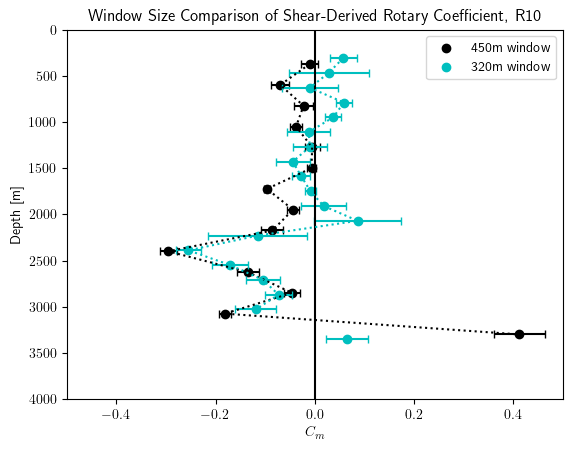

In [693]:
r10_mean_450_s, r10_mean_450_s_ci, r10_mean_450_s_stderr = mean_bootstrap(r10_450_cmf_tc_s,r10_450_cml_tc_s,
                                                                         r10_450_cmf_ts_s,r10_450_cml_ts_s)

r10_mean_s, r10_mean_s_ci, r10_mean_s_stderr = mean_bootstrap(r10_cmf_tc_s,r10_cml_tc_s,
                                                                         r10_cmf_ts_s,r08_cml_ts_s)

plt.scatter(r10_mean_450_s, depth450,c='k',label='450m window')
plt.errorbar(r10_mean_450_s, depth450, xerr = r10_mean_450_s_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r10_mean_s, depth,c='c',label='320m window')
plt.errorbar(r10_mean_s, depth, xerr = r10_mean_s_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Shear-Derived Rotary Coefficient, R10')

### R16 Window Comparison
### Velocity

Text(0, 0.5, 'Depth [m]')

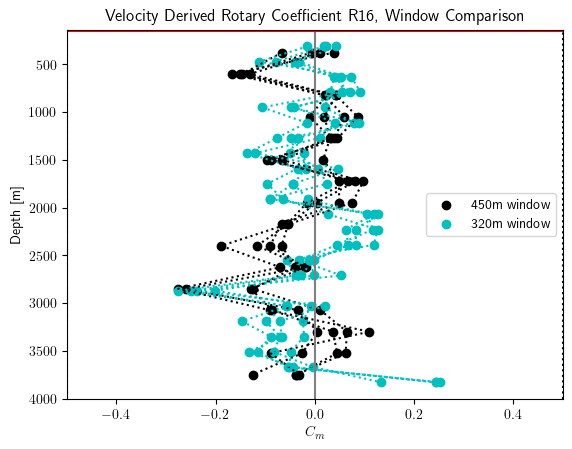

In [215]:
plt.scatter(r16_450_cmf_tc_v, depth450,c='k',label='450m window')
plt.scatter(r16_450_cml_tc_v, depth450,c='k')
plt.scatter(r16_450_cmf_ts_v, depth450,c='k')
plt.scatter(r16_450_cml_ts_v, depth450,c='k')

plt.plot(r16_450_cmf_tc_v, depth450, ls=':',c='k')
plt.plot(r16_450_cml_tc_v, depth450, ls=':',c='k')
plt.plot(r16_450_cmf_ts_v, depth450, ls=':',c='k')
plt.plot(r16_450_cml_ts_v, depth450, ls=':',c='k')

plt.scatter(r16_cmf_tc_v, depth,c='c',label='320m window')
plt.scatter(r16_cml_tc_v, depth,c='c')
plt.scatter(r16_cmf_ts_v, depth,c='c')
plt.scatter(r16_cml_ts_v, depth,c='c')

plt.plot(r16_cmf_tc_v, depth, ls=':',c='c')
plt.plot(r16_cml_tc_v, depth, ls=':',c='c')
plt.plot(r16_cmf_ts_v, depth, ls=':',c='c')
plt.plot(r16_cml_ts_v, depth, ls=':',c='c')

plt.xlim([-0.5,0.5])
plt.axvline(0.5, ls=':', c='k')
plt.axvline(-0.5, ls=':', c='k')
plt.axvline(0, c='grey')
plt.axhline(150,c='r')
plt.gca().invert_yaxis()
plt.legend(loc='right')
plt.title('Velocity Derived Rotary Coefficient, R16, Window Comparison')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Window Size Comparison of Velocity-Derived Rotary Coefficient, R16')

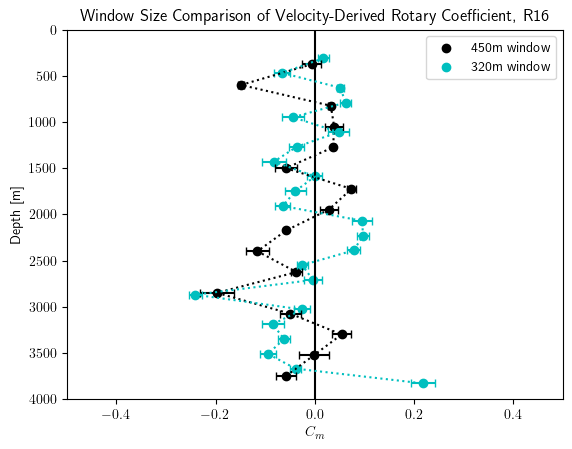

In [694]:
r16_mean_450_v, r16_mean_450_v_ci, r16_mean_450_v_stderr = mean_bootstrap(r16_450_cmf_tc_v,r16_450_cml_tc_v,
                                                                         r16_450_cmf_ts_v,r16_450_cml_ts_v)

r16_mean_v, r16_mean_v_ci, r16_mean_v_stderr = mean_bootstrap(r16_cmf_tc_v,r16_cml_tc_v,
                                                                         r16_cmf_ts_v,r16_cml_ts_v)

plt.scatter(r16_mean_450_v, depth450,c='k',label='450m window')
plt.errorbar(r16_mean_450_v, depth450, xerr = r16_mean_450_v_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r16_mean_v, depth,c='c',label='320m window')
plt.errorbar(r16_mean_v, depth, xerr = r16_mean_v_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Velocity-Derived Rotary Coefficient, R16')

### R15 Window Comparison Velocity

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Window Size Comparison of Velocity-Derived Rotary Coefficient, R15')

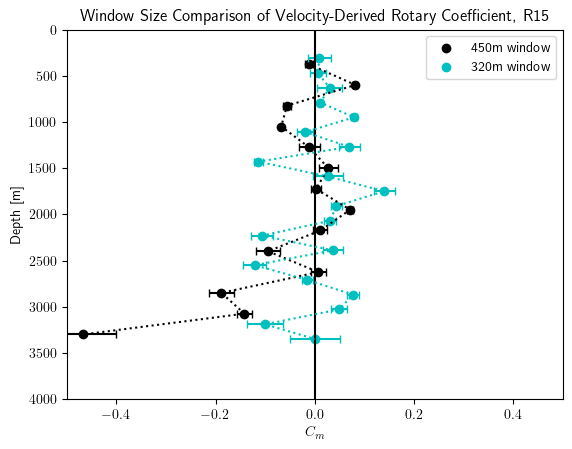

In [696]:
r15_mean_450_v, r15_mean_450_v_ci, r15_mean_450_v_stderr = mean_bootstrap(r15_450_cmf_tc_v,r15_450_cml_tc_v,
                                                                         r15_450_cmf_ts_v,r15_450_cml_ts_v)

r15_mean_v, r15_mean_v_ci, r15_mean_v_stderr = mean_bootstrap(r15_cmf_tc_v,r15_cml_tc_v,
                                                                         r15_cmf_ts_v,r15_cml_ts_v)

plt.scatter(r15_mean_450_v, depth450,c='k',label='450m window')
plt.errorbar(r15_mean_450_v, depth450, xerr = r15_mean_450_v_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r15_mean_v, depth,c='c',label='320m window')
plt.errorbar(r15_mean_v, depth, xerr = r15_mean_v_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Velocity-Derived Rotary Coefficient, R15')

### R17 Window Comparison Velocity

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Window Size Comparison of Velocity-Derived Rotary Coefficient, R17')

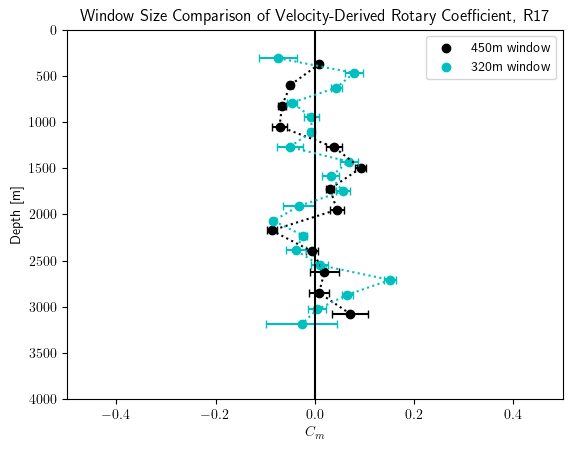

In [697]:
r17_mean_450_v, r17_mean_450_v_ci, r17_mean_450_v_stderr = mean_bootstrap(r17_450_cmf_tc_v,r17_450_cml_tc_v,
                                                                         r17_450_cmf_ts_v,r17_450_cml_ts_v)

r17_mean_v, r17_mean_v_ci, r17_mean_v_stderr = mean_bootstrap(r17_cmf_tc_v,r17_cml_tc_v,
                                                                         r17_cmf_ts_v,r17_cml_ts_v)

plt.scatter(r17_mean_450_v, depth450,c='k',label='450m window')
plt.errorbar(r17_mean_450_v, depth450, xerr = r17_mean_450_v_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r17_mean_v, depth,c='c',label='320m window')
plt.errorbar(r17_mean_v, depth, xerr = r17_mean_v_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Velocity-Derived Rotary Coefficient, R17')

### R16 Window Comparison
### Shear

Text(0, 0.5, 'Depth [m]')

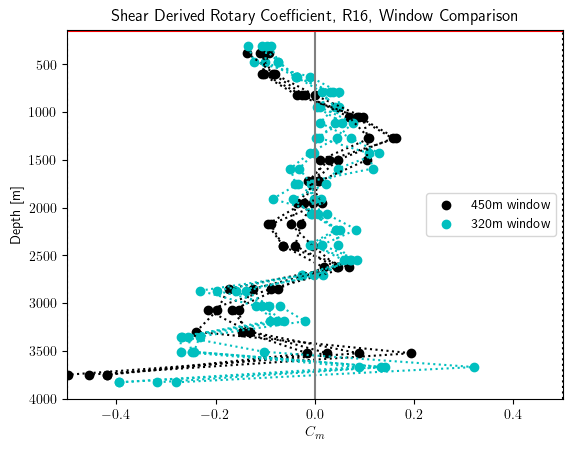

In [219]:
plt.scatter(r16_450_cmf_tc_s, depth450,c='k',label='450m window')
plt.scatter(r16_450_cml_tc_s, depth450,c='k')
plt.scatter(r16_450_cmf_ts_s, depth450,c='k')
plt.scatter(r16_450_cml_ts_s, depth450,c='k')

plt.plot(r16_450_cmf_tc_s, depth450, ls=':',c='k')
plt.plot(r16_450_cml_tc_s, depth450, ls=':',c='k')
plt.plot(r16_450_cmf_ts_s, depth450, ls=':',c='k')
plt.plot(r16_450_cml_ts_s, depth450, ls=':',c='k')

plt.scatter(r16_cmf_tc_s, depth,c='c',label='320m window')
plt.scatter(r16_cml_tc_s, depth,c='c')
plt.scatter(r16_cmf_ts_s, depth,c='c')
plt.scatter(r16_cml_ts_s, depth,c='c')

plt.plot(r16_cmf_tc_s, depth, ls=':',c='c')
plt.plot(r16_cml_tc_s, depth, ls=':',c='c')
plt.plot(r16_cmf_ts_s, depth, ls=':',c='c')
plt.plot(r16_cml_ts_s, depth, ls=':',c='c')

plt.xlim([-0.5,0.5])
plt.axvline(0.5, ls=':', c='k')
plt.axvline(-0.5, ls=':', c='k')
plt.axvline(0, c='grey')
plt.axhline(150,c='r')
plt.gca().invert_yaxis()
plt.legend(loc='right')
plt.title('Shear Derived Rotary Coefficient, R16, Window Comparison')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Window Size Comparison of Shear-Derived Rotary Coefficient, R16')

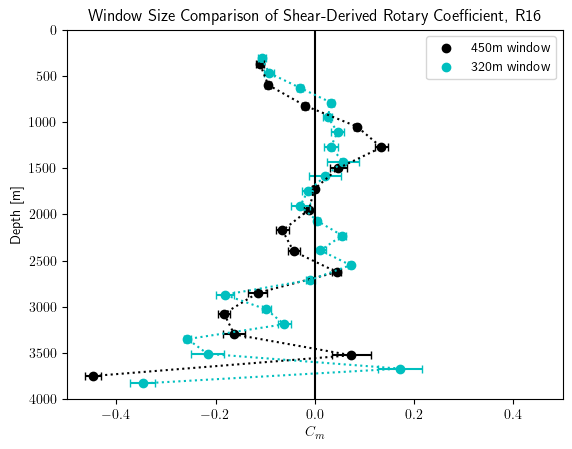

In [695]:
r16_mean_450_s, r16_mean_450_s_ci, r16_mean_450_s_stderr = mean_bootstrap(r16_450_cmf_tc_s,r16_450_cml_tc_s,
                                                                         r16_450_cmf_ts_s,r16_450_cml_ts_s)

r16_mean_s, r16_mean_s_ci, r16_mean_s_stderr = mean_bootstrap(r16_cmf_tc_s,r16_cml_tc_s,
                                                                         r16_cmf_ts_s,r16_cml_ts_s)

plt.scatter(r16_mean_450_s, depth450,c='k',label='450m window')
plt.errorbar(r16_mean_450_s, depth450, xerr = r16_mean_450_s_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r16_mean_s, depth,c='c',label='320m window')
plt.errorbar(r16_mean_s, depth, xerr = r16_mean_s_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Shear-Derived Rotary Coefficient, R16')

### R15 Window Size Comparison Shear

Text(0.5, 1.0, 'Window Size Comparison of Shear-Derived Rotary Coefficient, R15')

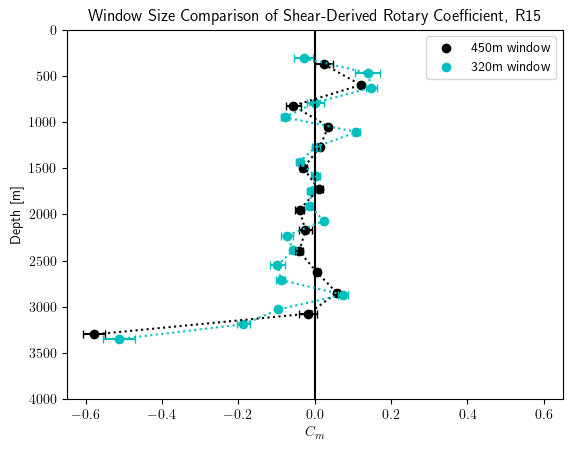

In [700]:
r15_mean_450_s, r15_mean_450_s_ci, r15_mean_450_s_stderr = mean_bootstrap(r15_450_cmf_tc_s,r15_450_cml_tc_s,
                                                                         r15_450_cmf_ts_s,r15_450_cml_ts_s)

r15_mean_s, r15_mean_s_ci, r15_mean_s_stderr = mean_bootstrap(r15_cmf_tc_s,r15_cml_tc_s,
                                                                         r15_cmf_ts_s,r15_cml_ts_s)

plt.scatter(r15_mean_450_s, depth450,c='k',label='450m window')
plt.errorbar(r15_mean_450_s, depth450, xerr = r15_mean_450_s_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r15_mean_s, depth,c='c',label='320m window')
plt.errorbar(r15_mean_s, depth, xerr = r15_mean_s_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.65,0.65])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Shear-Derived Rotary Coefficient, R15')

### R17 Window Comparison Shear

Text(0.5, 1.0, 'Window Size Comparison of Shear-Derived Rotary Coefficient, R17')

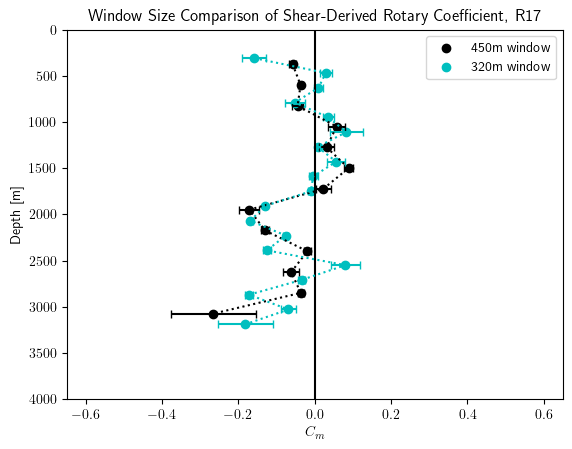

In [701]:
r17_mean_450_s, r17_mean_450_s_ci, r17_mean_450_s_stderr = mean_bootstrap(r17_450_cmf_tc_s,r17_450_cml_tc_s,
                                                                         r17_450_cmf_ts_s,r17_450_cml_ts_s)

r17_mean_s, r17_mean_s_ci, r17_mean_s_stderr = mean_bootstrap(r17_cmf_tc_s,r17_cml_tc_s,
                                                                         r17_cmf_ts_s,r17_cml_ts_s)

plt.scatter(r17_mean_450_s, depth450,c='k',label='450m window')
plt.errorbar(r17_mean_450_s, depth450, xerr = r17_mean_450_s_stderr, fmt='k',ls=':',capsize=3)

plt.scatter(r17_mean_s, depth,c='c',label='320m window')
plt.errorbar(r17_mean_s, depth, xerr = r17_mean_s_stderr, fmt='c',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.65,0.65])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Window Size Comparison of Shear-Derived Rotary Coefficient, R17')

# Short Wave Limit 

In [25]:
# load 450m window short cutoff data

r09_450_avg_coeff_50_180   = xr.open_dataset(data_dir+'window_450m_cutoff_50_180_avg_coeff/R09_w450_c50_180_avg_coeff.nc')
r09_450_avg_spectra_50_180 = xr.open_dataset(data_dir+'window_450m_cutoff_50_180_avg_spectra/R09_w450_c50_180_avg_spectra.nc')

r16_450_avg_coeff_50_180   = xr.open_dataset(data_dir+'window_450m_cutoff_50_180_avg_coeff/R16_w450_c50_180_avg_coeff.nc')
r16_450_avg_spectra_50_180 = xr.open_dataset(data_dir+'window_450m_cutoff_50_180_avg_spectra/R16_w450_c50_180_avg_spectra.nc')

r09_450_avg_coeff_40_180   = xr.open_dataset(data_dir+'window_450m_cutoff_40_180_avg_coeff/R09_w450_c40_180_avg_coeff.nc')
r09_450_avg_spectra_40_180 = xr.open_dataset(data_dir+'window_450m_cutoff_40_180_avg_spectra/R09_w450_c40_180_avg_spectra.nc')

r16_450_avg_coeff_40_180   = xr.open_dataset(data_dir+'window_450m_cutoff_40_180_avg_coeff/R16_w450_c40_180_avg_coeff.nc')
r16_450_avg_spectra_40_180 = xr.open_dataset(data_dir+'window_450m_cutoff_40_180_avg_spectra/R16_w450_c40_180_avg_spectra.nc')

r09_450_avg_coeff_30_180   = xr.open_dataset(data_dir+'window_450m_cutoff_30_180_avg_coeff/R09_w450_c30_180_avg_coeff.nc')
r09_450_avg_spectra_30_180 = xr.open_dataset(data_dir+'window_450m_cutoff_30_180_avg_spectra/R09_w450_c30_180_avg_spectra.nc')

r16_450_avg_coeff_30_180   = xr.open_dataset(data_dir+'window_450m_cutoff_30_180_avg_coeff/R16_w450_c30_180_avg_coeff.nc')
r16_450_avg_spectra_30_180 = xr.open_dataset(data_dir+'window_450m_cutoff_30_180_avg_spectra/R16_w450_c30_180_avg_spectra.nc')

r09_450_avg_coeff_20_180   = xr.open_dataset(data_dir+'window_450m_cutoff_20_180_avg_coeff/R09_w450_c20_180_avg_coeff.nc')
r09_450_avg_spectra_20_180 = xr.open_dataset(data_dir+'window_450m_cutoff_20_180_avg_spectra/R09_w450_c20_180_avg_spectra.nc')

r16_450_avg_coeff_20_180   = xr.open_dataset(data_dir+'window_450m_cutoff_20_180_avg_coeff/R16_w450_c20_180_avg_coeff.nc')
r16_450_avg_spectra_20_180 = xr.open_dataset(data_dir+'window_450m_cutoff_20_180_avg_spectra/R16_w450_c20_180_avg_spectra.nc')

In [26]:
# time average coefficients 

r09_450_avg_coeff_50_180 = r09_450_avg_coeff_50_180.rotary_coeff.mean(dim='profile_number')
r09_450_avg_coeff_40_180 = r09_450_avg_coeff_40_180.rotary_coeff.mean(dim='profile_number')
r09_450_avg_coeff_30_180 = r09_450_avg_coeff_30_180.rotary_coeff.mean(dim='profile_number')
r09_450_avg_coeff_20_180 = r09_450_avg_coeff_20_180.rotary_coeff.mean(dim='profile_number')

r16_450_avg_coeff_50_180 = r16_450_avg_coeff_50_180.rotary_coeff.mean(dim='profile_number')
r16_450_avg_coeff_40_180 = r16_450_avg_coeff_40_180.rotary_coeff.mean(dim='profile_number')
r16_450_avg_coeff_30_180 = r16_450_avg_coeff_30_180.rotary_coeff.mean(dim='profile_number')
r16_450_avg_coeff_20_180 = r16_450_avg_coeff_20_180.rotary_coeff.mean(dim='profile_number')

In [27]:
r09_450_cmf_tc_v_50_180 = r09_450_avg_coeff_50_180.sel(coeff_method='coeff_first', variable='velocity')
r09_450_cml_tc_v_50_180 = r09_450_avg_coeff_50_180.sel(coeff_method='coeff_last', variable='velocity')
r09_450_cmf_ts_v_50_180 = r09_450_avg_spectra_50_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_v_50_180 = r09_450_avg_spectra_50_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_v_40_180 = r09_450_avg_coeff_40_180.sel(coeff_method='coeff_first', variable='velocity')
r09_450_cml_tc_v_40_180 = r09_450_avg_coeff_40_180.sel(coeff_method='coeff_last', variable='velocity')
r09_450_cmf_ts_v_40_180 = r09_450_avg_spectra_40_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_v_40_180 = r09_450_avg_spectra_40_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_v_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='velocity')
r09_450_cml_tc_v_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='velocity')
r09_450_cmf_ts_v_30_180 = r09_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_v_30_180 = r09_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_v_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='velocity')
r09_450_cml_tc_v_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='velocity')
r09_450_cmf_ts_v_30_180 = r09_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_v_30_180 = r09_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_v_20_180 = r09_450_avg_coeff_20_180.sel(coeff_method='coeff_first', variable='velocity')
r09_450_cml_tc_v_20_180 = r09_450_avg_coeff_20_180.sel(coeff_method='coeff_last', variable='velocity')
r09_450_cmf_ts_v_20_180 = r09_450_avg_spectra_20_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_v_20_180 = r09_450_avg_spectra_20_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_s_50_180 = r09_450_avg_coeff_50_180.sel(coeff_method='coeff_first', variable='shear')
r09_450_cml_tc_s_50_180 = r09_450_avg_coeff_50_180.sel(coeff_method='coeff_last', variable='shear')
r09_450_cmf_ts_s_50_180 = r09_450_avg_spectra_50_180.shear_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_s_50_180 = r09_450_avg_spectra_50_180.shear_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_s_40_180 = r09_450_avg_coeff_40_180.sel(coeff_method='coeff_first', variable='shear')
r09_450_cml_tc_s_40_180 = r09_450_avg_coeff_40_180.sel(coeff_method='coeff_last', variable='shear')
r09_450_cmf_ts_s_40_180 = r09_450_avg_spectra_40_180.shear_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_s_40_180 = r09_450_avg_spectra_40_180.shear_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_s_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='shear')
r09_450_cml_tc_s_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='shear')
r09_450_cmf_ts_s_30_180 = r09_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_s_30_180 = r09_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_s_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='shear')
r09_450_cml_tc_s_30_180 = r09_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='shear')
r09_450_cmf_ts_s_30_180 = r09_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_s_30_180 = r09_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_s_20_180 = r09_450_avg_coeff_20_180.sel(coeff_method='coeff_first', variable='shear')
r09_450_cml_tc_s_20_180 = r09_450_avg_coeff_20_180.sel(coeff_method='coeff_last', variable='shear')
r09_450_cmf_ts_s_20_180 = r09_450_avg_spectra_20_180.shear_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_s_20_180 = r09_450_avg_spectra_20_180.shear_derived_Rc.sel(comp_method='coeff_last')

In [28]:
r16_450_cmf_tc_v_50_180 = r16_450_avg_coeff_50_180.sel(coeff_method='coeff_first', variable='velocity')
r16_450_cml_tc_v_50_180 = r16_450_avg_coeff_50_180.sel(coeff_method='coeff_last', variable='velocity')
r16_450_cmf_ts_v_50_180 = r16_450_avg_spectra_50_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_v_50_180 = r16_450_avg_spectra_50_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_v_40_180 = r16_450_avg_coeff_40_180.sel(coeff_method='coeff_first', variable='velocity')
r16_450_cml_tc_v_40_180 = r16_450_avg_coeff_40_180.sel(coeff_method='coeff_last', variable='velocity')
r16_450_cmf_ts_v_40_180 = r16_450_avg_spectra_40_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_v_40_180 = r16_450_avg_spectra_40_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_v_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='velocity')
r16_450_cml_tc_v_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='velocity')
r16_450_cmf_ts_v_30_180 = r16_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_v_30_180 = r16_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_v_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='velocity')
r16_450_cml_tc_v_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='velocity')
r16_450_cmf_ts_v_30_180 = r16_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_v_30_180 = r16_450_avg_spectra_30_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_v_20_180 = r16_450_avg_coeff_20_180.sel(coeff_method='coeff_first', variable='velocity')
r16_450_cml_tc_v_20_180 = r16_450_avg_coeff_20_180.sel(coeff_method='coeff_last', variable='velocity')
r16_450_cmf_ts_v_20_180 = r16_450_avg_spectra_20_180.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_v_20_180 = r16_450_avg_spectra_20_180.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_s_50_180 = r16_450_avg_coeff_50_180.sel(coeff_method='coeff_first', variable='shear')
r16_450_cml_tc_s_50_180 = r16_450_avg_coeff_50_180.sel(coeff_method='coeff_last', variable='shear')
r16_450_cmf_ts_s_50_180 = r16_450_avg_spectra_50_180.shear_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_s_50_180 = r16_450_avg_spectra_50_180.shear_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_s_40_180 = r16_450_avg_coeff_40_180.sel(coeff_method='coeff_first', variable='shear')
r16_450_cml_tc_s_40_180 = r16_450_avg_coeff_40_180.sel(coeff_method='coeff_last', variable='shear')
r16_450_cmf_ts_s_40_180 = r16_450_avg_spectra_40_180.shear_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_s_40_180 = r16_450_avg_spectra_40_180.shear_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_s_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='shear')
r16_450_cml_tc_s_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='shear')
r16_450_cmf_ts_s_30_180 = r16_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_s_30_180 = r16_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_s_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_first', variable='shear')
r16_450_cml_tc_s_30_180 = r16_450_avg_coeff_30_180.sel(coeff_method='coeff_last', variable='shear')
r16_450_cmf_ts_s_30_180 = r16_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_s_30_180 = r16_450_avg_spectra_30_180.shear_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_s_20_180 = r16_450_avg_coeff_20_180.sel(coeff_method='coeff_first', variable='shear')
r16_450_cml_tc_s_20_180 = r16_450_avg_coeff_20_180.sel(coeff_method='coeff_last', variable='shear')
r16_450_cmf_ts_s_20_180 = r16_450_avg_spectra_20_180.shear_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_s_20_180 = r16_450_avg_spectra_20_180.shear_derived_Rc.sel(comp_method='coeff_last')

### R09 Short Wave Limit Velocity

In [252]:
# plot coeff first, time-averaged coeff

plt.scatter(r09_450_cmf_tc_v, depth450, c='lightsteelblue', label='coeff first, time-averaged coeff, 60m lim')
plt.scatter(r09_450_cmf_tc_v_50_180, depth450, c='cornflowerblue', label='coeff first, time-averaged coeff, 50m lim')
plt.scatter(r09_450_cmf_tc_v_40_180, depth450, c='royalblue', label='coeff first, time-averaged coeff, 40m lim')
plt.scatter(r09_450_cmf_tc_v_30_180, depth450, c='blue', label='coeff first, time-averaged coeff, 30m lim')
plt.scatter(r09_450_cmf_tc_v_20_180, depth450, c='darkblue', label='coeff first, time-averaged coeff, 20m lim')

plt.plot(r09_450_cmf_tc_v, depth450, c='lightsteelblue', ls=':')
plt.plot(r09_450_cmf_tc_v_50_180, depth450, c='cornflowerblue', ls=':')
plt.plot(r09_450_cmf_tc_v_40_180, depth450, c='royalblue', ls=':')
plt.plot(r09_450_cmf_tc_v_30_180, depth450, c='blue', ls=':')
plt.plot(r09_450_cmf_tc_v_20_180, depth450, c='darkblue', ls=':')

plt.xlim([-0.1,0.1])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

Text(0.5, 1.0, 'Velocity Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

In [255]:
# plot coeff first, time-averaged spectra

plt.scatter(r09_450_cmf_ts_v, depth450, c='lightgreen', label='coeff first, time-averaged spectra, 60m lim')
plt.scatter(r09_450_cmf_ts_v_50_180, depth450, c='limegreen', label='coeff first, time-averaged spectra, 50m lim')
plt.scatter(r09_450_cmf_ts_v_40_180, depth450, c='mediumseagreen', label='coeff first, time-averaged spectra, 40m lim')
plt.scatter(r09_450_cmf_ts_v_30_180, depth450, c='green', label='coeff first, time-averaged spectra, 30m lim')
plt.scatter(r09_450_cmf_ts_v_20_180, depth450, c='darkgreen', label='coeff first, time-averaged spectra, 20m lim')

plt.plot(r09_450_cmf_ts_v, depth450, c='lightgreen', ls=':')
plt.plot(r09_450_cmf_ts_v_50_180, depth450, c='limegreen', ls=':')
plt.plot(r09_450_cmf_ts_v_40_180, depth450, c='mediumseagreen', ls=':')
plt.plot(r09_450_cmf_ts_v_30_180, depth450, c='green', ls=':')
plt.plot(r09_450_cmf_ts_v_20_180, depth450, c='darkgreen', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

Text(0.5, 1.0, 'Velocity Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

In [278]:
# plot coeff first, time-averaged spectra

plt.scatter(r09_450_cml_tc_v, depth450, c='papayawhip', label='coeff last, time-averaged coeff, 60m lim')
plt.scatter(r09_450_cml_tc_v_50_180, depth450, c='peachpuff', label='coeff last, time-averaged coeff, 50m lim')
plt.scatter(r09_450_cml_tc_v_40_180, depth450, c='orange', label='coeff last, time-averaged coeff, 40m lim')
plt.scatter(r09_450_cml_tc_v_30_180, depth450, c='darkorange', label='coeff last, time-averaged coeff, 30m lim')
plt.scatter(r09_450_cml_tc_v_20_180, depth450, c='orangered', label='coeff last, time-averaged coeff, 20m lim')

plt.plot(r09_450_cml_tc_v, depth450, c='papayawhip', ls=':')
plt.plot(r09_450_cml_tc_v_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r09_450_cml_tc_v_40_180, depth450, c='orange', ls=':')
plt.plot(r09_450_cml_tc_v_30_180, depth450, c='darkorange', ls=':')
plt.plot(r09_450_cml_tc_v_20_180, depth450, c='orangered', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor("grey")

In [276]:
# plot coeff first, time-averaged spectra

plt.scatter(r09_450_cml_ts_v, depth450, c='pink', label='coeff last, time-averaged spectra, 60m lim')
plt.scatter(r09_450_cml_ts_v_50_180, depth450, c='lightcoral', label='coeff last, time-averaged spectra, 50m lim')
plt.scatter(r09_450_cml_ts_v_40_180, depth450, c='indianred', label='coeff last, time-averaged spectra, 40m lim')
plt.scatter(r09_450_cml_ts_v_30_180, depth450, c='brown', label='coeff last, time-averaged spectra, 30m lim')
plt.scatter(r09_450_cml_ts_v_20_180, depth450, c='darkred', label='coeff last, time-averaged spectra, 20m lim')

plt.plot(r09_450_cml_ts_v, depth450, c='papayawhip', ls=':')
plt.plot(r09_450_cml_ts_v_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r09_450_cml_ts_v_40_180, depth450, c='indianred', ls=':')
plt.plot(r09_450_cml_ts_v_30_180, depth450, c='brown', ls=':')
plt.plot(r09_450_cml_ts_v_20_180, depth450, c='darkred', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor("lightgrey")

In [275]:
plt.scatter(r09_450_cmf_tc_v, depth450, c='lightsteelblue', label='coeff first, time-averaged coeff, 60m lim')
plt.scatter(r09_450_cmf_tc_v_50_180, depth450, c='cornflowerblue', label='coeff first, time-averaged coeff, 50m lim')
plt.scatter(r09_450_cmf_tc_v_40_180, depth450, c='royalblue', label='coeff first, time-averaged coeff, 40m lim')
plt.scatter(r09_450_cmf_tc_v_30_180, depth450, c='blue', label='coeff first, time-averaged coeff, 30m lim')
plt.scatter(r09_450_cmf_tc_v_20_180, depth450, c='darkblue', label='coeff first, time-averaged coeff, 20m lim')

plt.plot(r09_450_cmf_tc_v, depth450, c='lightsteelblue', ls=':')
plt.plot(r09_450_cmf_tc_v_50_180, depth450, c='cornflowerblue', ls=':')
plt.plot(r09_450_cmf_tc_v_40_180, depth450, c='royalblue', ls=':')
plt.plot(r09_450_cmf_tc_v_30_180, depth450, c='blue', ls=':')
plt.plot(r09_450_cmf_tc_v_20_180, depth450, c='darkblue', ls=':')

plt.scatter(r09_450_cmf_ts_v, depth450, c='lightgreen', label='coeff first, time-averaged spectra, 60m lim')
plt.scatter(r09_450_cmf_ts_v_50_180, depth450, c='limegreen', label='coeff first, time-averaged spectra, 50m lim')
plt.scatter(r09_450_cmf_ts_v_40_180, depth450, c='mediumseagreen', label='coeff first, time-averaged spectra, 40m lim')
plt.scatter(r09_450_cmf_ts_v_30_180, depth450, c='green', label='coeff first, time-averaged spectra, 30m lim')
plt.scatter(r09_450_cmf_ts_v_20_180, depth450, c='darkgreen', label='coeff first, time-averaged spectra, 20m lim')

plt.plot(r09_450_cmf_ts_v, depth450, c='lightgreen', ls=':')
plt.plot(r09_450_cmf_ts_v_50_180, depth450, c='limegreen', ls=':')
plt.plot(r09_450_cmf_ts_v_40_180, depth450, c='mediumseagreen', ls=':')
plt.plot(r09_450_cmf_ts_v_30_180, depth450, c='green', ls=':')
plt.plot(r09_450_cmf_ts_v_20_180, depth450, c='darkgreen', ls=':')

plt.scatter(r09_450_cml_tc_v, depth450, c='papayawhip', label='coeff last, time-averaged coeff, 60m lim')
plt.scatter(r09_450_cml_tc_v_50_180, depth450, c='peachpuff', label='coeff last, time-averaged coeff, 50m lim')
plt.scatter(r09_450_cml_tc_v_40_180, depth450, c='orange', label='coeff last, time-averaged coeff, 40m lim')
plt.scatter(r09_450_cml_tc_v_30_180, depth450, c='darkorange', label='coeff last, time-averaged coeff, 30m lim')
plt.scatter(r09_450_cml_tc_v_20_180, depth450, c='orangered', label='coeff last, time-averaged coeff, 20m lim')

plt.plot(r09_450_cml_tc_v, depth450, c='papayawhip', ls=':')
plt.plot(r09_450_cml_tc_v_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r09_450_cml_tc_v_40_180, depth450, c='orange', ls=':')
plt.plot(r09_450_cml_tc_v_30_180, depth450, c='darkorange', ls=':')
plt.plot(r09_450_cml_tc_v_20_180, depth450, c='orangered', ls=':')

plt.scatter(r09_450_cml_ts_v, depth450, c='pink', label='coeff last, time-averaged spectra, 60m lim')
plt.scatter(r09_450_cml_ts_v_50_180, depth450, c='lightcoral', label='coeff last, time-averaged spectra, 50m lim')
plt.scatter(r09_450_cml_ts_v_40_180, depth450, c='indianred', label='coeff last, time-averaged spectra, 40m lim')
plt.scatter(r09_450_cml_ts_v_30_180, depth450, c='brown', label='coeff last, time-averaged spectra, 30m lim')
plt.scatter(r09_450_cml_ts_v_20_180, depth450, c='darkred', label='coeff last, time-averaged spectra, 20m lim')

plt.plot(r09_450_cml_ts_v, depth450, c='papayawhip', ls=':')
plt.plot(r09_450_cml_ts_v_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r09_450_cml_ts_v_40_180, depth450, c='indianred', ls=':')
plt.plot(r09_450_cml_ts_v_30_180, depth450, c='brown', ls=':')
plt.plot(r09_450_cml_ts_v_20_180, depth450, c='darkred', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[1,0])
plt.title('Velocity Derived Rotary Coefficient, R09, Short Wave Limit Comparison')

plt.gca().set_facecolor("lightgrey")

### R09 Short Wave Limit, Shear

Text(0.5, 1.0, 'Shear Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

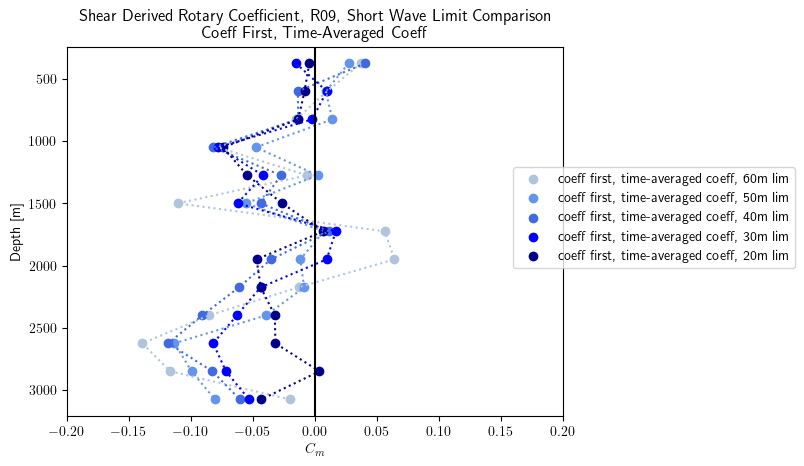

In [280]:
plt.scatter(r09_450_cmf_tc_s, depth450, c='lightsteelblue', label='coeff first, time-averaged coeff, 60m lim')
plt.scatter(r09_450_cmf_tc_s_50_180, depth450, c='cornflowerblue', label='coeff first, time-averaged coeff, 50m lim')
plt.scatter(r09_450_cmf_tc_s_40_180, depth450, c='royalblue', label='coeff first, time-averaged coeff, 40m lim')
plt.scatter(r09_450_cmf_tc_s_30_180, depth450, c='blue', label='coeff first, time-averaged coeff, 30m lim')
plt.scatter(r09_450_cmf_tc_s_20_180, depth450, c='darkblue', label='coeff first, time-averaged coeff, 20m lim')

plt.plot(r09_450_cmf_tc_s, depth450, c='lightsteelblue', ls=':')
plt.plot(r09_450_cmf_tc_s_50_180, depth450, c='cornflowerblue', ls=':')
plt.plot(r09_450_cmf_tc_s_40_180, depth450, c='royalblue', ls=':')
plt.plot(r09_450_cmf_tc_s_30_180, depth450, c='blue', ls=':')
plt.plot(r09_450_cmf_tc_s_20_180, depth450, c='darkblue', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

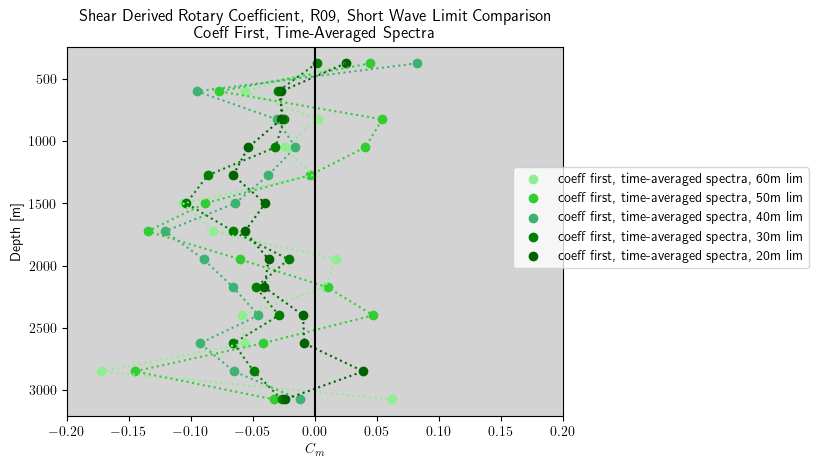

In [285]:
plt.scatter(r09_450_cmf_ts_s, depth450, c='lightgreen', label='coeff first, time-averaged spectra, 60m lim')
plt.scatter(r09_450_cmf_ts_s_50_180, depth450, c='limegreen', label='coeff first, time-averaged spectra, 50m lim')
plt.scatter(r09_450_cmf_ts_s_40_180, depth450, c='mediumseagreen', label='coeff first, time-averaged spectra, 40m lim')
plt.scatter(r09_450_cmf_ts_s_30_180, depth450, c='green', label='coeff first, time-averaged spectra, 30m lim')
plt.scatter(r09_450_cmf_ts_s_20_180, depth450, c='darkgreen', label='coeff first, time-averaged spectra, 20m lim')

plt.plot(r09_450_cmf_ts_s, depth450, c='lightgreen', ls=':')
plt.plot(r09_450_cmf_ts_s_50_180, depth450, c='limegreen', ls=':')
plt.plot(r09_450_cmf_ts_s_40_180, depth450, c='mediumseagreen', ls=':')
plt.plot(r09_450_cmf_ts_s_30_180, depth450, c='green', ls=':')
plt.plot(r09_450_cmf_ts_s_20_180, depth450, c='darkgreen', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

plt.gca().set_facecolor('lightgrey')

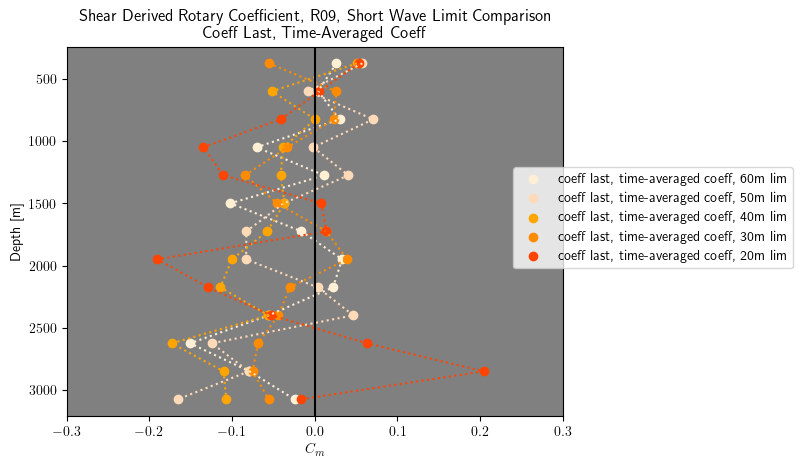

In [283]:
plt.scatter(r09_450_cml_tc_s, depth450, c='papayawhip', label='coeff last, time-averaged coeff, 60m lim')
plt.scatter(r09_450_cml_tc_s_50_180, depth450, c='peachpuff', label='coeff last, time-averaged coeff, 50m lim')
plt.scatter(r09_450_cml_tc_s_40_180, depth450, c='orange', label='coeff last, time-averaged coeff, 40m lim')
plt.scatter(r09_450_cml_tc_s_30_180, depth450, c='darkorange', label='coeff last, time-averaged coeff, 30m lim')
plt.scatter(r09_450_cml_tc_s_20_180, depth450, c='orangered', label='coeff last, time-averaged coeff, 20m lim')

plt.plot(r09_450_cml_tc_s, depth450, c='papayawhip', ls=':')
plt.plot(r09_450_cml_tc_s_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r09_450_cml_tc_s_40_180, depth450, c='orange', ls=':')
plt.plot(r09_450_cml_tc_s_30_180, depth450, c='darkorange', ls=':')
plt.plot(r09_450_cml_tc_s_20_180, depth450, c='orangered', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor("grey")

In [288]:
# plot coeff first, time-averaged spectra

plt.scatter(r09_450_cml_ts_s, depth450, c='pink', label='coeff last, time-averaged spectra, 60m lim')
plt.scatter(r09_450_cml_ts_s_50_180, depth450, c='lightcoral', label='coeff last, time-averaged spectra, 50m lim')
plt.scatter(r09_450_cml_ts_s_40_180, depth450, c='indianred', label='coeff last, time-averaged spectra, 40m lim')
plt.scatter(r09_450_cml_ts_s_30_180, depth450, c='brown', label='coeff last, time-averaged spectra, 30m lim')
plt.scatter(r09_450_cml_ts_s_20_180, depth450, c='darkred', label='coeff last, time-averaged spectra, 20m lim')

plt.plot(r09_450_cml_ts_s, depth450, c='papayawhip', ls=':')
plt.plot(r09_450_cml_ts_s_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r09_450_cml_ts_s_40_180, depth450, c='indianred', ls=':')
plt.plot(r09_450_cml_ts_s_30_180, depth450, c='brown', ls=':')
plt.plot(r09_450_cml_ts_s_20_180, depth450, c='darkred', ls=':')

plt.xlim([-0.4,0.4])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R09, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor("lightgrey")

### R16 Short Wave Limit, Velocity

Text(0.5, 1.0, 'Velocity Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

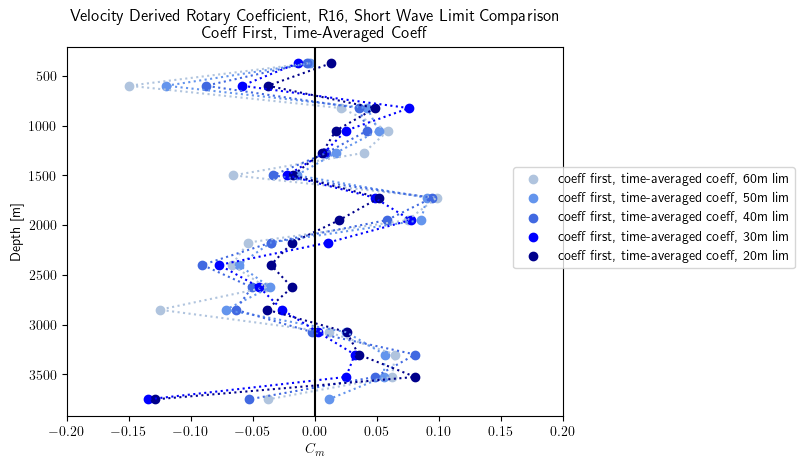

In [290]:
plt.scatter(r16_450_cmf_tc_v, depth450, c='lightsteelblue', label='coeff first, time-averaged coeff, 60m lim')
plt.scatter(r16_450_cmf_tc_v_50_180, depth450, c='cornflowerblue', label='coeff first, time-averaged coeff, 50m lim')
plt.scatter(r16_450_cmf_tc_v_40_180, depth450, c='royalblue', label='coeff first, time-averaged coeff, 40m lim')
plt.scatter(r16_450_cmf_tc_v_30_180, depth450, c='blue', label='coeff first, time-averaged coeff, 30m lim')
plt.scatter(r16_450_cmf_tc_v_20_180, depth450, c='darkblue', label='coeff first, time-averaged coeff, 20m lim')

plt.plot(r16_450_cmf_tc_v, depth450, c='lightsteelblue', ls=':')
plt.plot(r16_450_cmf_tc_v_50_180, depth450, c='cornflowerblue', ls=':')
plt.plot(r16_450_cmf_tc_v_40_180, depth450, c='royalblue', ls=':')
plt.plot(r16_450_cmf_tc_v_30_180, depth450, c='blue', ls=':')
plt.plot(r16_450_cmf_tc_v_20_180, depth450, c='darkblue', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

In [291]:
# plot coeff first, time-averaged spectra

plt.scatter(r16_450_cmf_ts_v, depth450, c='lightgreen', label='coeff first, time-averaged spectra, 60m lim')
plt.scatter(r16_450_cmf_ts_v_50_180, depth450, c='limegreen', label='coeff first, time-averaged spectra, 50m lim')
plt.scatter(r16_450_cmf_ts_v_40_180, depth450, c='mediumseagreen', label='coeff first, time-averaged spectra, 40m lim')
plt.scatter(r16_450_cmf_ts_v_30_180, depth450, c='green', label='coeff first, time-averaged spectra, 30m lim')
plt.scatter(r16_450_cmf_ts_v_20_180, depth450, c='darkgreen', label='coeff first, time-averaged spectra, 20m lim')

plt.plot(r16_450_cmf_ts_v, depth450, c='lightgreen', ls=':')
plt.plot(r16_450_cmf_ts_v_50_180, depth450, c='limegreen', ls=':')
plt.plot(r16_450_cmf_ts_v_40_180, depth450, c='mediumseagreen', ls=':')
plt.plot(r16_450_cmf_ts_v_30_180, depth450, c='green', ls=':')
plt.plot(r16_450_cmf_ts_v_20_180, depth450, c='darkgreen', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

Text(0.5, 1.0, 'Velocity Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

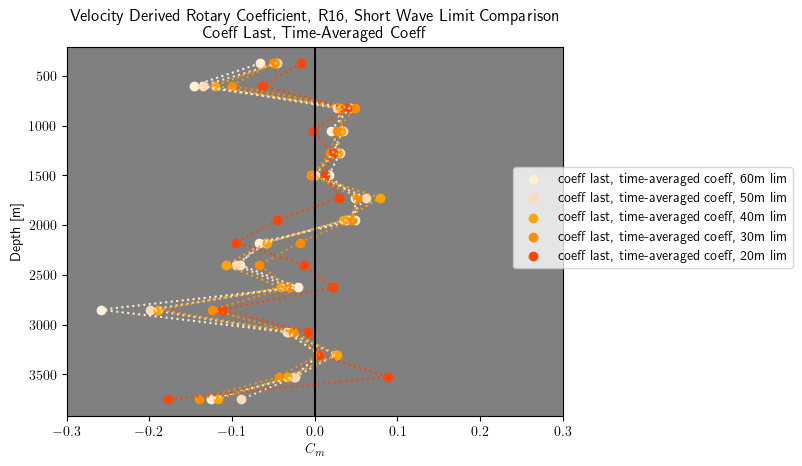

In [293]:
# plot coeff first, time-averaged spectra

plt.scatter(r16_450_cml_tc_v, depth450, c='papayawhip', label='coeff last, time-averaged coeff, 60m lim')
plt.scatter(r16_450_cml_tc_v_50_180, depth450, c='peachpuff', label='coeff last, time-averaged coeff, 50m lim')
plt.scatter(r16_450_cml_tc_v_40_180, depth450, c='orange', label='coeff last, time-averaged coeff, 40m lim')
plt.scatter(r16_450_cml_tc_v_30_180, depth450, c='darkorange', label='coeff last, time-averaged coeff, 30m lim')
plt.scatter(r16_450_cml_tc_v_20_180, depth450, c='orangered', label='coeff last, time-averaged coeff, 20m lim')

plt.plot(r16_450_cml_tc_v, depth450, c='papayawhip', ls=':')
plt.plot(r16_450_cml_tc_v_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r16_450_cml_tc_v_40_180, depth450, c='orange', ls=':')
plt.plot(r16_450_cml_tc_v_30_180, depth450, c='darkorange', ls=':')
plt.plot(r16_450_cml_tc_v_20_180, depth450, c='orangered', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor("grey")

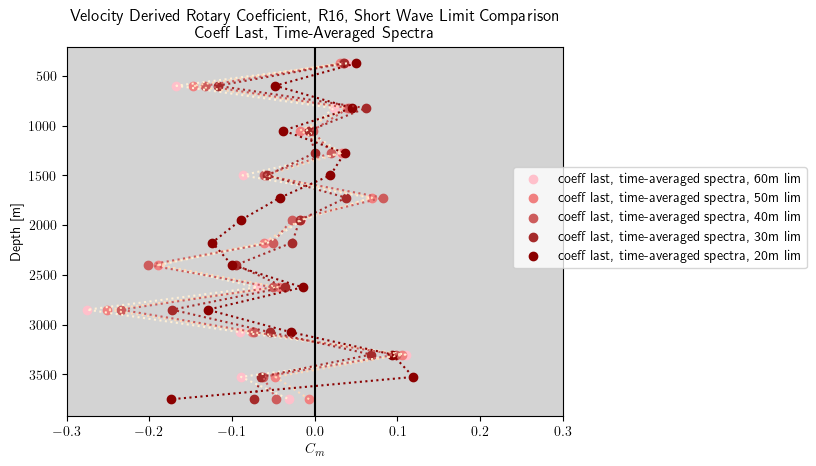

In [295]:
# plot coeff first, time-averaged spectra

plt.scatter(r16_450_cml_ts_v, depth450, c='pink', label='coeff last, time-averaged spectra, 60m lim')
plt.scatter(r16_450_cml_ts_v_50_180, depth450, c='lightcoral', label='coeff last, time-averaged spectra, 50m lim')
plt.scatter(r16_450_cml_ts_v_40_180, depth450, c='indianred', label='coeff last, time-averaged spectra, 40m lim')
plt.scatter(r16_450_cml_ts_v_30_180, depth450, c='brown', label='coeff last, time-averaged spectra, 30m lim')
plt.scatter(r16_450_cml_ts_v_20_180, depth450, c='darkred', label='coeff last, time-averaged spectra, 20m lim')

plt.plot(r16_450_cml_ts_v, depth450, c='papayawhip', ls=':')
plt.plot(r16_450_cml_ts_v_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r16_450_cml_ts_v_40_180, depth450, c='indianred', ls=':')
plt.plot(r16_450_cml_ts_v_30_180, depth450, c='brown', ls=':')
plt.plot(r16_450_cml_ts_v_20_180, depth450, c='darkred', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Velocity Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor("lightgrey")

### R16 Short Wave Limit Comparison, Shear

Text(0.5, 1.0, 'Shear Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

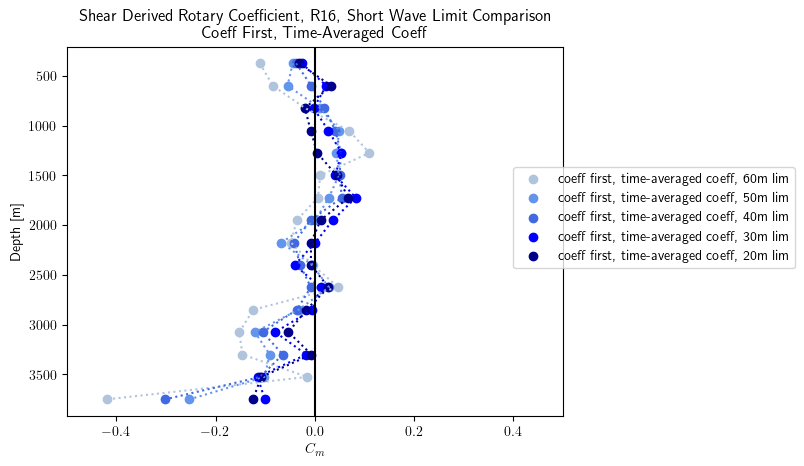

In [299]:
plt.scatter(r16_450_cmf_tc_s, depth450, c='lightsteelblue', label='coeff first, time-averaged coeff, 60m lim')
plt.scatter(r16_450_cmf_tc_s_50_180, depth450, c='cornflowerblue', label='coeff first, time-averaged coeff, 50m lim')
plt.scatter(r16_450_cmf_tc_s_40_180, depth450, c='royalblue', label='coeff first, time-averaged coeff, 40m lim')
plt.scatter(r16_450_cmf_tc_s_30_180, depth450, c='blue', label='coeff first, time-averaged coeff, 30m lim')
plt.scatter(r16_450_cmf_tc_s_20_180, depth450, c='darkblue', label='coeff first, time-averaged coeff, 20m lim')

plt.plot(r16_450_cmf_tc_s, depth450, c='lightsteelblue', ls=':')
plt.plot(r16_450_cmf_tc_s_50_180, depth450, c='cornflowerblue', ls=':')
plt.plot(r16_450_cmf_tc_s_40_180, depth450, c='royalblue', ls=':')
plt.plot(r16_450_cmf_tc_s_30_180, depth450, c='blue', ls=':')
plt.plot(r16_450_cmf_tc_s_20_180, depth450, c='darkblue', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

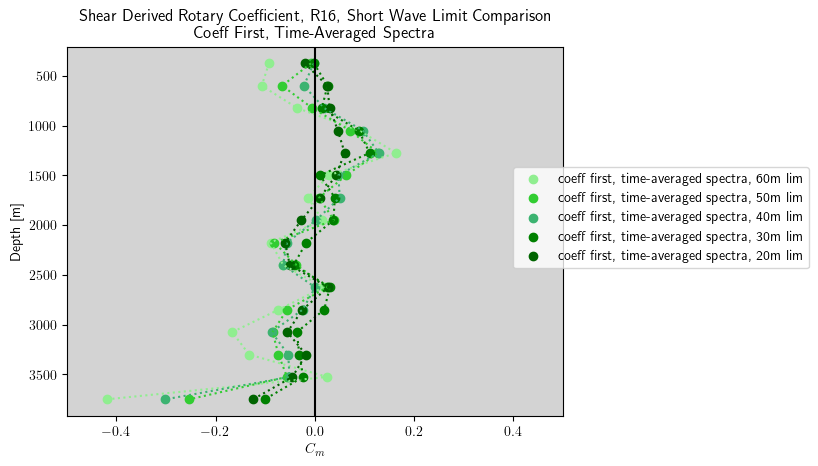

In [303]:
plt.scatter(r16_450_cmf_ts_s, depth450, c='lightgreen', label='coeff first, time-averaged spectra, 60m lim')
plt.scatter(r16_450_cmf_ts_s_50_180, depth450, c='limegreen', label='coeff first, time-averaged spectra, 50m lim')
plt.scatter(r16_450_cmf_ts_s_40_180, depth450, c='mediumseagreen', label='coeff first, time-averaged spectra, 40m lim')
plt.scatter(r16_450_cmf_ts_s_30_180, depth450, c='green', label='coeff first, time-averaged spectra, 30m lim')
plt.scatter(r16_450_cmf_ts_s_20_180, depth450, c='darkgreen', label='coeff first, time-averaged spectra, 20m lim')

plt.plot(r16_450_cmf_ts_s, depth450, c='lightgreen', ls=':')
plt.plot(r16_450_cmf_ts_s_50_180, depth450, c='limegreen', ls=':')
plt.plot(r16_450_cmf_ts_s_40_180, depth450, c='mediumseagreen', ls=':')
plt.plot(r16_450_cmf_ts_s_30_180, depth450, c='green', ls=':')
plt.plot(r16_450_cmf_ts_s_20_180, depth450, c='darkgreen', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

plt.gca().set_facecolor('lightgrey')

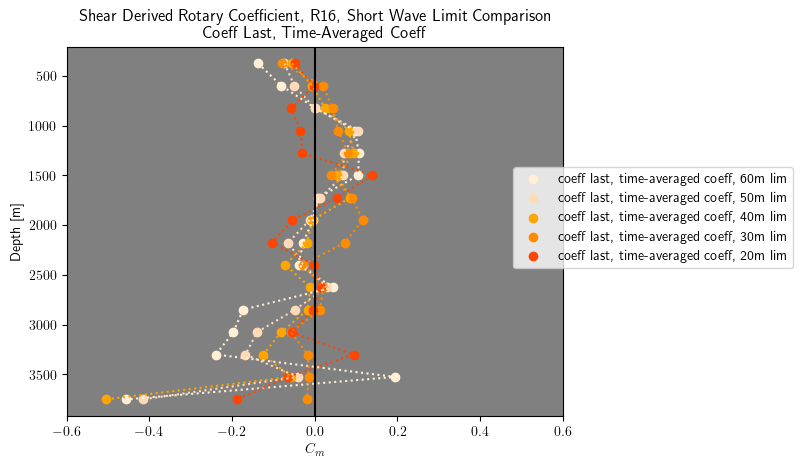

In [306]:
plt.scatter(r16_450_cml_tc_s, depth450, c='papayawhip', label='coeff last, time-averaged coeff, 60m lim')
plt.scatter(r16_450_cml_tc_s_50_180, depth450, c='peachpuff', label='coeff last, time-averaged coeff, 50m lim')
plt.scatter(r16_450_cml_tc_s_40_180, depth450, c='orange', label='coeff last, time-averaged coeff, 40m lim')
plt.scatter(r16_450_cml_tc_s_30_180, depth450, c='darkorange', label='coeff last, time-averaged coeff, 30m lim')
plt.scatter(r16_450_cml_tc_s_20_180, depth450, c='orangered', label='coeff last, time-averaged coeff, 20m lim')

plt.plot(r16_450_cml_tc_s, depth450, c='papayawhip', ls=':')
plt.plot(r16_450_cml_tc_s_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r16_450_cml_tc_s_40_180, depth450, c='orange', ls=':')
plt.plot(r16_450_cml_tc_s_30_180, depth450, c='darkorange', ls=':')
plt.plot(r16_450_cml_tc_s_20_180, depth450, c='orangered', ls=':')

plt.xlim([-0.6,0.6])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor("grey")

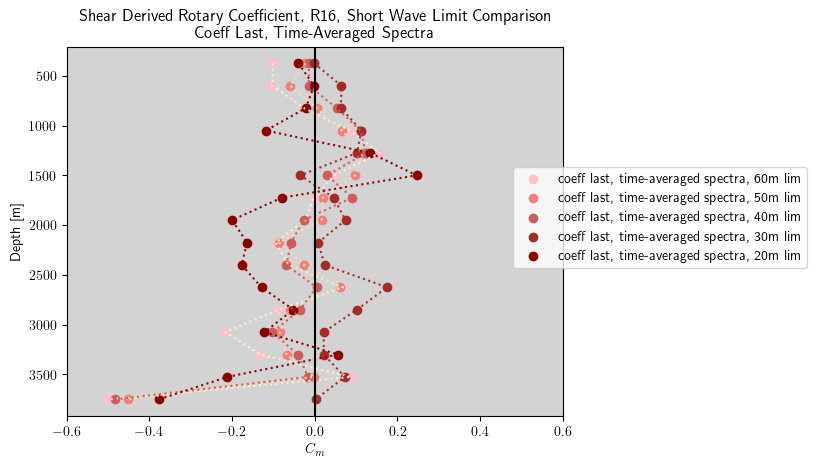

In [309]:
# plot coeff first, time-averaged spectra

plt.scatter(r16_450_cml_ts_s, depth450, c='pink', label='coeff last, time-averaged spectra, 60m lim')
plt.scatter(r16_450_cml_ts_s_50_180, depth450, c='lightcoral', label='coeff last, time-averaged spectra, 50m lim')
plt.scatter(r16_450_cml_ts_s_40_180, depth450, c='indianred', label='coeff last, time-averaged spectra, 40m lim')
plt.scatter(r16_450_cml_ts_s_30_180, depth450, c='brown', label='coeff last, time-averaged spectra, 30m lim')
plt.scatter(r16_450_cml_ts_s_20_180, depth450, c='darkred', label='coeff last, time-averaged spectra, 20m lim')

plt.plot(r16_450_cml_ts_s, depth450, c='papayawhip', ls=':')
plt.plot(r16_450_cml_ts_s_50_180, depth450, c='peachpuff', ls=':')
plt.plot(r16_450_cml_ts_s_40_180, depth450, c='indianred', ls=':')
plt.plot(r16_450_cml_ts_s_30_180, depth450, c='brown', ls=':')
plt.plot(r16_450_cml_ts_s_20_180, depth450, c='darkred', ls=':')

plt.xlim([-0.6,0.6])
plt.axvline(0,c='k')
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend(loc=[.9,0.4])
plt.title('Shear Derived Rotary Coefficient, R16, Short Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor("lightgrey")

# Long Wave Limit

In [21]:
# load data

r09_450_avg_coeff_60_230   = xr.open_dataset(data_dir+'window_450m_cutoff_60_230_avg_coeff/R09_w450_c60_230_avg_coeff.nc')
r09_450_avg_spectra_60_230 = xr.open_dataset(data_dir+'window_450m_cutoff_60_230_avg_spectra/R09_w450_c60_230_avg_spectra.nc')

r16_450_avg_coeff_60_230   = xr.open_dataset(data_dir+'window_450m_cutoff_60_230_avg_coeff/R16_w450_c60_230_avg_coeff.nc')
r16_450_avg_spectra_60_230 = xr.open_dataset(data_dir+'window_450m_cutoff_60_230_avg_spectra/R16_w450_c60_230_avg_spectra.nc')


In [22]:
# time average coefficients 

r09_450_avg_coeff_60_230 = r09_450_avg_coeff_60_230.rotary_coeff.mean(dim='profile_number')
r16_450_avg_coeff_60_230 = r16_450_avg_coeff_60_230.rotary_coeff.mean(dim='profile_number')

In [23]:
r09_450_cmf_tc_v_60_230 = r09_450_avg_coeff_60_230.sel(coeff_method='coeff_first',variable='velocity')
r09_450_cml_tc_v_60_230 = r09_450_avg_coeff_60_230.sel(coeff_method='coeff_last',variable='velocity')
r09_450_cmf_ts_v_60_230 = r09_450_avg_spectra_60_230.velocity_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_v_60_230 = r09_450_avg_spectra_60_230.velocity_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_v_60_230 = r16_450_avg_coeff_60_230.sel(coeff_method='coeff_first',variable='velocity')
r16_450_cml_tc_v_60_230 = r16_450_avg_coeff_60_230.sel(coeff_method='coeff_last',variable='velocity')
r16_450_cmf_ts_v_60_230 = r16_450_avg_spectra_60_230.velocity_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_v_60_230 = r16_450_avg_spectra_60_230.velocity_derived_Rc.sel(comp_method='coeff_last')

r09_450_cmf_tc_s_60_230 = r09_450_avg_coeff_60_230.sel(coeff_method='coeff_first',variable='shear')
r09_450_cml_tc_s_60_230 = r09_450_avg_coeff_60_230.sel(coeff_method='coeff_last',variable='shear')
r09_450_cmf_ts_s_60_230 = r09_450_avg_spectra_60_230.shear_derived_Rc.sel(comp_method='coeff_first')
r09_450_cml_ts_s_60_230 = r09_450_avg_spectra_60_230.shear_derived_Rc.sel(comp_method='coeff_last')

r16_450_cmf_tc_s_60_230 = r16_450_avg_coeff_60_230.sel(coeff_method='coeff_first',variable='shear')
r16_450_cml_tc_s_60_230 = r16_450_avg_coeff_60_230.sel(coeff_method='coeff_last',variable='shear')
r16_450_cmf_ts_s_60_230 = r16_450_avg_spectra_60_230.shear_derived_Rc.sel(comp_method='coeff_first')
r16_450_cml_ts_s_60_230 = r16_450_avg_spectra_60_230.shear_derived_Rc.sel(comp_method='coeff_last')

### R09 Long Wave Limit, Velocity

Text(0.5, 1.0, 'Velocity Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

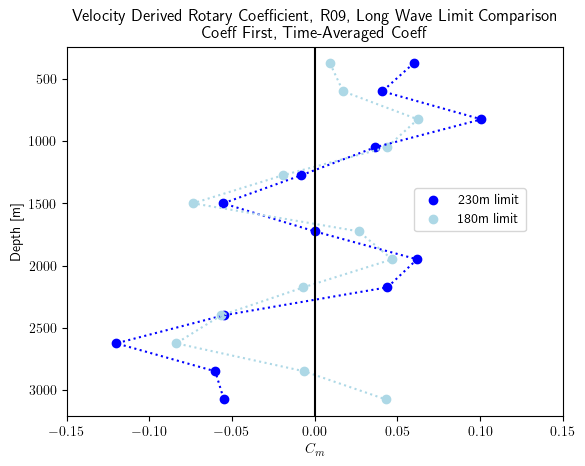

In [338]:
plt.scatter(r09_450_cmf_tc_v_60_230, depth450, c='blue',label = '230m limit')
plt.scatter(r09_450_cmf_tc_v, depth450,c='lightblue', label='180m limit')

plt.plot(r09_450_cmf_tc_v_60_230, depth450, c='blue', ls=':')
plt.plot(r09_450_cmf_tc_v, depth450,c='lightblue', ls=':')

plt.xlim([-0.15,0.15])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

In [339]:
plt.scatter(r09_450_cmf_ts_v_60_230, depth450, c='green',label = '230m limit')
plt.scatter(r09_450_cmf_ts_v, depth450,c='lightgreen', label='180m limit')

plt.plot(r09_450_cmf_ts_v_60_230, depth450, c='green', ls=':')
plt.plot(r09_450_cmf_ts_v, depth450,c='lightgreen', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

Text(0.5, 1.0, 'Velocity-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

In [345]:
plt.scatter(r09_450_cml_tc_v_60_230, depth450, c='orangered',label = '230m limit')
plt.scatter(r09_450_cml_tc_v, depth450,c='orange', label='180m limit')

plt.plot(r09_450_cml_tc_v_60_230, depth450, c='orangered', ls=':')
plt.plot(r09_450_cml_tc_v, depth450,c='orange', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor('grey')

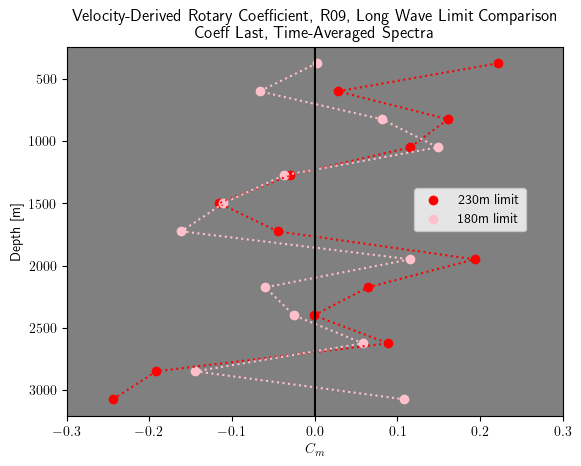

In [346]:
plt.scatter(r09_450_cml_ts_v_60_230, depth450, c='red',label = '230m limit')
plt.scatter(r09_450_cml_ts_v, depth450,c='pink', label='180m limit')

plt.plot(r09_450_cml_ts_v_60_230, depth450, c='red', ls=':')
plt.plot(r09_450_cml_ts_v, depth450,c='pink', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor('grey')

### R09 Long Wave Limit, Shear

Text(0.5, 1.0, 'Shear Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

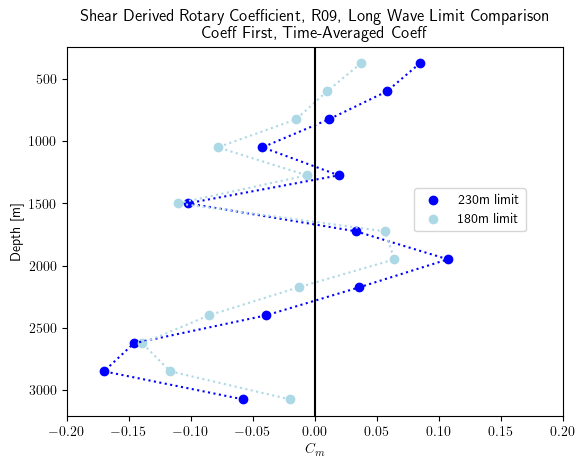

In [348]:
plt.scatter(r09_450_cmf_tc_s_60_230, depth450, c='blue',label = '230m limit')
plt.scatter(r09_450_cmf_tc_s, depth450,c='lightblue', label='180m limit')

plt.plot(r09_450_cmf_tc_s_60_230, depth450, c='blue', ls=':')
plt.plot(r09_450_cmf_tc_s, depth450,c='lightblue', ls=':')

plt.xlim([-0.2,0.2])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

Text(0.5, 1.0, 'Shear-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

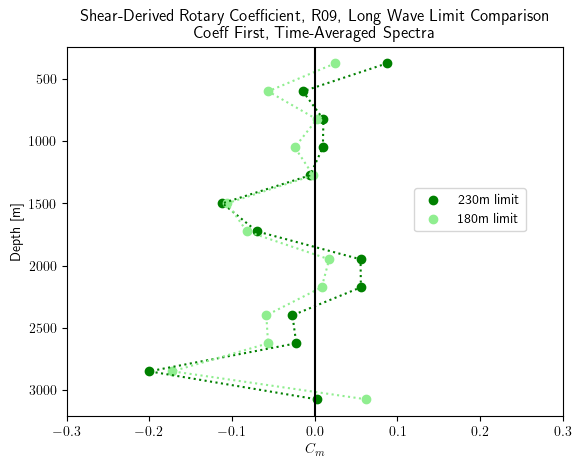

In [350]:
plt.scatter(r09_450_cmf_ts_s_60_230, depth450, c='green',label = '230m limit')
plt.scatter(r09_450_cmf_ts_s, depth450,c='lightgreen', label='180m limit')

plt.plot(r09_450_cmf_ts_s_60_230, depth450, c='green', ls=':')
plt.plot(r09_450_cmf_ts_s, depth450,c='lightgreen', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

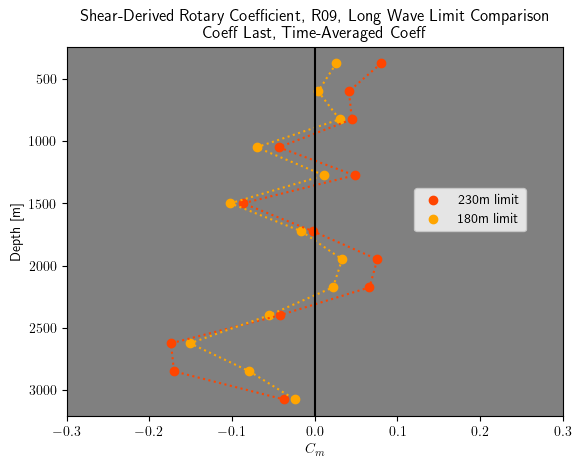

In [351]:
plt.scatter(r09_450_cml_tc_s_60_230, depth450, c='orangered',label = '230m limit')
plt.scatter(r09_450_cml_tc_s, depth450,c='orange', label='180m limit')

plt.plot(r09_450_cml_tc_s_60_230, depth450, c='orangered', ls=':')
plt.plot(r09_450_cml_tc_s, depth450,c='orange', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor('grey')

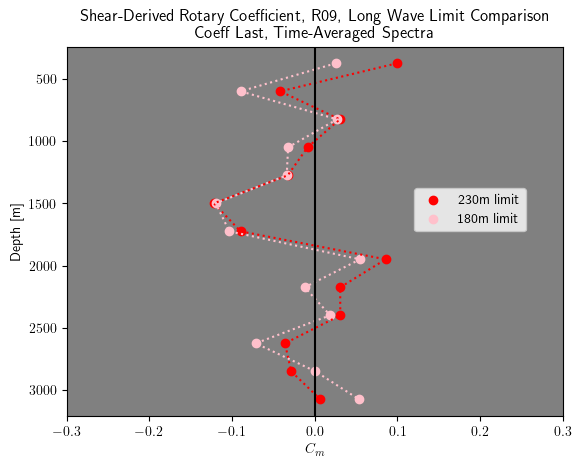

In [352]:
plt.scatter(r09_450_cml_ts_s_60_230, depth450, c='red',label = '230m limit')
plt.scatter(r09_450_cml_ts_s, depth450,c='pink', label='180m limit')

plt.plot(r09_450_cml_ts_s_60_230, depth450, c='red', ls=':')
plt.plot(r09_450_cml_ts_s, depth450,c='pink', ls=':')

plt.xlim([-0.3,0.3])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear-Derived Rotary Coefficient, R09, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor('grey')

### R16 Long Wave Limit, Velocity

In [705]:
plt.scatter(r16_450_cmf_tc_v_60_230, depth450, c='blue',label = '230m limit')
plt.scatter(r16_450_cmf_tc_v, depth450,c='lightblue', label='180m limit')

plt.plot(r16_450_cmf_tc_v_60_230, depth450, c='blue', ls=':')
plt.plot(r16_450_cmf_tc_v, depth450,c='lightblue', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.8,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

Text(0.5, 1.0, 'Velocity Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

In [704]:
plt.scatter(r16_450_cmf_ts_v_60_230, depth450, c='green',label = '230m limit')
plt.scatter(r16_450_cmf_ts_v, depth450,c='lightgreen', label='180m limit')

plt.plot(r16_450_cmf_ts_v_60_230, depth450, c='green', ls=':')
plt.plot(r16_450_cmf_ts_v, depth450,c='lightgreen', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.8,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

Text(0.5, 1.0, 'Velocity-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

In [703]:
plt.scatter(r16_450_cml_tc_v_60_230, depth450, c='orangered',label = '230m limit')
plt.scatter(r16_450_cml_tc_v, depth450,c='orange', label='180m limit')

plt.plot(r16_450_cml_tc_v_60_230, depth450, c='orangered', ls=':')
plt.plot(r16_450_cml_tc_v, depth450,c='orange', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor('grey')

In [702]:
plt.scatter(r16_450_cml_ts_v_60_230, depth450, c='red',label = '230m limit')
plt.scatter(r16_450_cml_ts_v, depth450,c='pink', label='180m limit')

plt.plot(r16_450_cml_ts_v_60_230, depth450, c='red', ls=':')
plt.plot(r16_450_cml_ts_v, depth450,c='pink', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Velocity-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor('grey')

### R16 Long Wave Limit, Shear

Text(0.5, 1.0, 'Shear Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

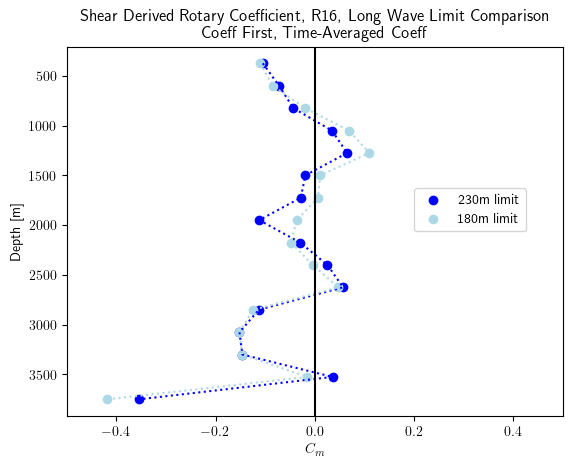

In [363]:
plt.scatter(r16_450_cmf_tc_s_60_230, depth450, c='blue',label = '230m limit')
plt.scatter(r16_450_cmf_tc_s, depth450,c='lightblue', label='180m limit')

plt.plot(r16_450_cmf_tc_s_60_230, depth450, c='blue', ls=':')
plt.plot(r16_450_cmf_tc_s, depth450,c='lightblue', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Coeff')

Text(0.5, 1.0, 'Shear-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

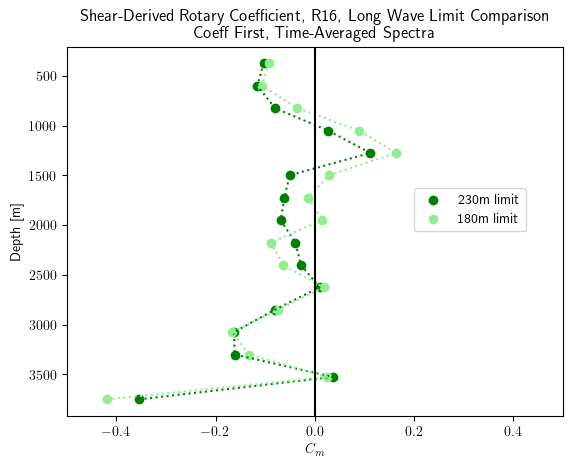

In [365]:
plt.scatter(r16_450_cmf_ts_s_60_230, depth450, c='green',label = '230m limit')
plt.scatter(r16_450_cmf_ts_s, depth450,c='lightgreen', label='180m limit')

plt.plot(r16_450_cmf_ts_s_60_230, depth450, c='green', ls=':')
plt.plot(r16_450_cmf_ts_s, depth450,c='lightgreen', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff First, Time-Averaged Spectra')

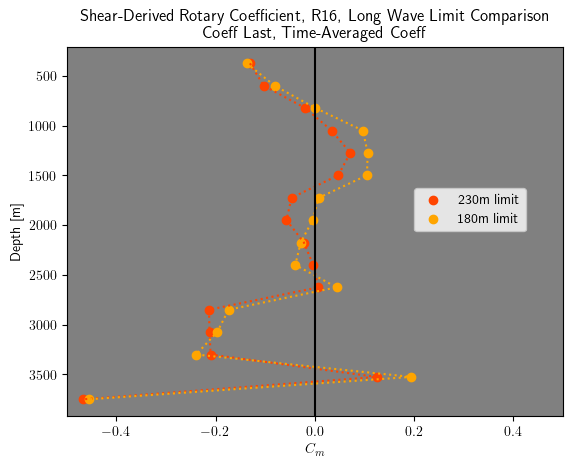

In [368]:
plt.scatter(r16_450_cml_tc_s_60_230, depth450, c='orangered',label = '230m limit')
plt.scatter(r16_450_cml_tc_s, depth450,c='orange', label='180m limit')

plt.plot(r16_450_cml_tc_s_60_230, depth450, c='orangered', ls=':')
plt.plot(r16_450_cml_tc_s, depth450,c='orange', ls=':')

plt.xlim([-0.5,0.5])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Coeff')

plt.gca().set_facecolor('grey')

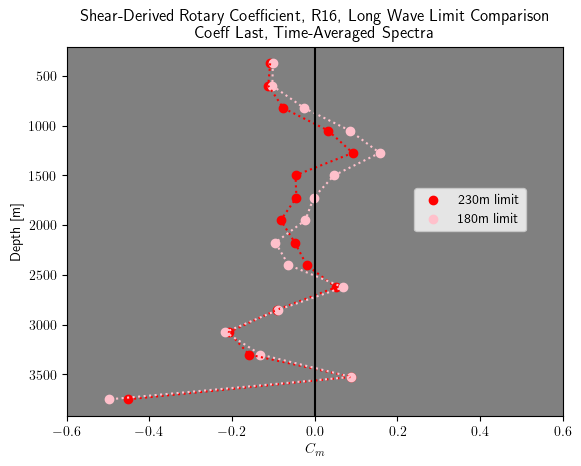

In [371]:
plt.scatter(r16_450_cml_ts_s_60_230, depth450, c='red',label = '230m limit')
plt.scatter(r16_450_cml_ts_s, depth450,c='pink', label='180m limit')

plt.plot(r16_450_cml_ts_s_60_230, depth450, c='red', ls=':')
plt.plot(r16_450_cml_ts_s, depth450,c='pink', ls=':')

plt.xlim([-0.6,0.6])
plt.axvline(0,c='k')
plt.gca().invert_yaxis()
plt.legend(loc=[.7,.5])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.title('Shear-Derived Rotary Coefficient, R16, Long Wave Limit Comparison\n Coeff Last, Time-Averaged Spectra')

plt.gca().set_facecolor('grey')

Text(0.5, 1.0, 'Long Wave Limit Comparison of Velocity-Derived Rotary Coefficient, R09')

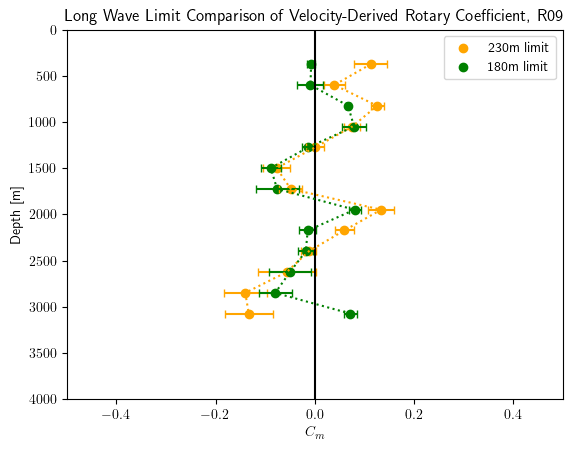

In [36]:
r09_mean_450_v_230, r09_mean_450_v_ci_230, r09_mean_450_v_stderr_230 = mean_bootstrap(r09_450_cml_ts_v_60_230, 
                                                                                     r09_450_cml_tc_v_60_230,
                                                                                     r09_450_cmf_ts_v_60_230,
                                                                                     r09_450_cmf_tc_v_60_230)

r09_mean_450_v_180, r09_mean_450_v_ci_180, r09_mean_450_v_stderr_180 = mean_bootstrap(r09_450_cml_ts_v, 
                                                                                     r09_450_cml_tc_v,
                                                                                     r09_450_cmf_ts_v,
                                                                                     r09_450_cmf_tc_v)


plt.scatter(r09_mean_450_v_230, depth450,c='orange',label='230m limit')
plt.errorbar(r09_mean_450_v_230, depth450, xerr = r09_mean_450_v_stderr_230, fmt='orange',ls=':',capsize=3)

plt.scatter(r09_mean_450_v_180, depth450,c='g',label='180m limit')
plt.errorbar(r09_mean_450_v_180, depth450, xerr = r09_mean_450_v_stderr_180, fmt='g',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Long Wave Limit Comparison of Velocity-Derived Rotary Coefficient, R09')

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Long Wave Limit Comparison of Shear-Derived Rotary Coefficient, R09')

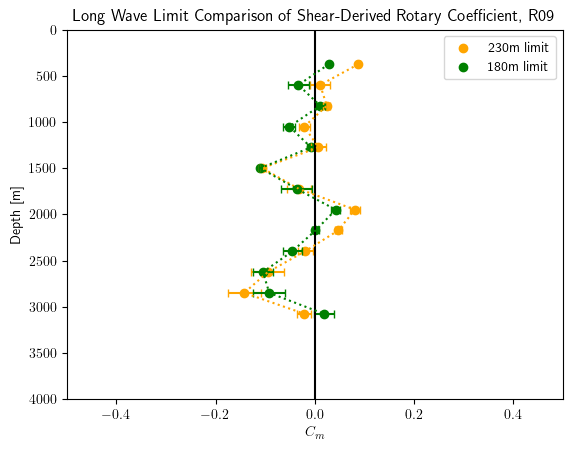

In [37]:
r09_mean_450_s_230, r09_mean_450_s_ci_230, r09_mean_450_s_stderr_230 = mean_bootstrap(r09_450_cml_ts_s_60_230, 
                                                                                     r09_450_cml_tc_s_60_230,
                                                                                     r09_450_cmf_ts_s_60_230,
                                                                                     r09_450_cmf_tc_s_60_230)

r09_mean_450_s_180, r09_mean_450_s_ci_180, r09_mean_450_s_stderr_180 = mean_bootstrap(r09_450_cml_ts_s, 
                                                                                     r09_450_cml_tc_s,
                                                                                     r09_450_cmf_ts_s,
                                                                                     r09_450_cmf_tc_s)


plt.scatter(r09_mean_450_s_230, depth450,c='orange',label='230m limit')
plt.errorbar(r09_mean_450_s_230, depth450, xerr = r09_mean_450_s_stderr_230, fmt='orange',ls=':',capsize=3)

plt.scatter(r09_mean_450_s_180, depth450,c='g',label='180m limit')
plt.errorbar(r09_mean_450_s_180, depth450, xerr = r09_mean_450_s_stderr_180, fmt='g',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Long Wave Limit Comparison of Shear-Derived Rotary Coefficient, R09')

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Long Wave Limit Comparison of Velocity-Derived Rotary Coefficient, R16')

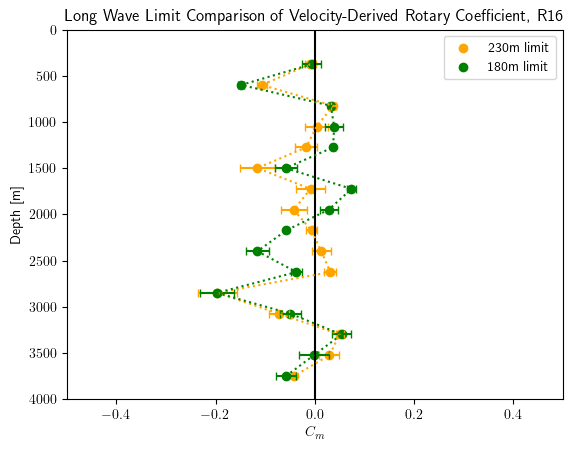

In [38]:
r16_mean_450_v_230, r16_mean_450_v_ci_230, r16_mean_450_v_stderr_230 = mean_bootstrap(r16_450_cml_ts_v_60_230, 
                                                                                     r16_450_cml_tc_v_60_230,
                                                                                     r16_450_cmf_ts_v_60_230,
                                                                                     r16_450_cmf_tc_v_60_230)

r16_mean_450_v_180, r16_mean_450_v_ci_180, r16_mean_450_v_stderr_180 = mean_bootstrap(r16_450_cml_ts_v, 
                                                                                     r16_450_cml_tc_v,
                                                                                     r16_450_cmf_ts_v,
                                                                                     r16_450_cmf_tc_v)


plt.scatter(r16_mean_450_v_230, depth450,c='orange',label='230m limit')
plt.errorbar(r16_mean_450_v_230, depth450, xerr = r16_mean_450_v_stderr_230, fmt='orange',ls=':',capsize=3)

plt.scatter(r16_mean_450_v_180, depth450,c='g',label='180m limit')
plt.errorbar(r16_mean_450_v_180, depth450, xerr = r16_mean_450_v_stderr_180, fmt='g',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Long Wave Limit Comparison of Velocity-Derived Rotary Coefficient, R16')

/Users/connordiaz/opt/miniconda3/envs/keras/lib/python3.10/site-packages/scipy/stats/_resampling.py:92: DegenerateDataWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(DegenerateDataWarning(msg))


Text(0.5, 1.0, 'Long Wave Limit Comparison of Shear-Derived Rotary Coefficient, R16')

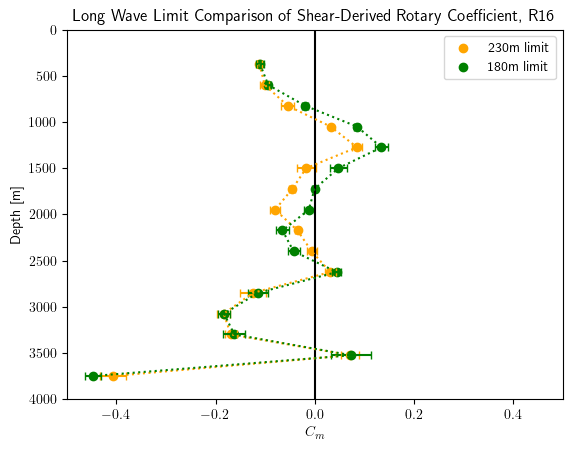

In [39]:
r16_mean_450_s_230, r16_mean_450_s_ci_230, r16_mean_450_s_stderr_230 = mean_bootstrap(r16_450_cml_ts_s_60_230, 
                                                                                     r16_450_cml_tc_s_60_230,
                                                                                     r16_450_cmf_ts_s_60_230,
                                                                                     r16_450_cmf_tc_s_60_230)

r16_mean_450_s_180, r16_mean_450_s_ci_180, r16_mean_450_s_stderr_180 = mean_bootstrap(r16_450_cml_ts_s, 
                                                                                     r16_450_cml_tc_s,
                                                                                     r16_450_cmf_ts_s,
                                                                                     r16_450_cmf_tc_s)


plt.scatter(r16_mean_450_s_230, depth450,c='orange',label='230m limit')
plt.errorbar(r16_mean_450_s_230, depth450, xerr = r16_mean_450_s_stderr_230, fmt='orange',ls=':',capsize=3)

plt.scatter(r16_mean_450_s_180, depth450,c='g',label='180m limit')
plt.errorbar(r16_mean_450_s_180, depth450, xerr = r16_mean_450_s_stderr_180, fmt='g',ls=':',capsize=3)

plt.axvline(0,c='k')
plt.xlim([-0.5,0.5])
plt.ylim([0,4000])
plt.xlabel(r'$C_m$')
plt.ylabel('Depth [m]')
plt.legend()

plt.gca().invert_yaxis()

plt.title('Long Wave Limit Comparison of Shear-Derived Rotary Coefficient, R16')